## Library Imports

In [1]:
from scipy.signal import lfilter
from scipy.signal import butter
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os

## Bandpass Filter

In [2]:
# Creating Butterworth Bandpass Filter
def butter_bandpass(lowcut : int, highcut : int, fs : int, order=5):
    """ Create a Butterworth Bandpass Filter

        \tlowcut: low cut frequency (in Hz)
        \thighcut: high cut frequency (in Hz)
        \tfs: sampling frequency (in Hz)
        \torder: order of the filter (default = 5)

        return: b, a: numerator (b) and denominator (a) polynomials of the IIR filter   """

    nyq = 0.5 * fs                                      # Nyquist frequency (half of the sampling frequency)
    low = lowcut / nyq                                  # Normalized low cut frequency
    high = highcut / nyq                                # Normalized high cut frequency
    b, a = butter(order, [low, high], btype='band')     # Create Butterworth bandpass filter
    return b, a                                         # Return numerator (b) and denominator (a) polynomials of the IIR filter


def butter_bandpass_filter(data, lowcut : int, highcut : int, fs : int, order=5):
    """     Apply a Butterworth Bandpass Filter   
            
            \tdata: signal to be filtered
            \tlowcut: low cut frequency (in Hz)
            \thighcut: high cut frequency (in Hz)
            \tfs: sampling frequency (in Hz)
            \torder: order of the filter (default = 5)

            return: y: filtered signal   """


    b, a = butter_bandpass(lowcut, highcut, fs, order=order)    # Create Butterworth bandpass filter
    y = lfilter(b, a, data)                                     # Apply filter
    return y                                                    # Return filtered signal

# Visualizing the entire dataset after bandpass filter.

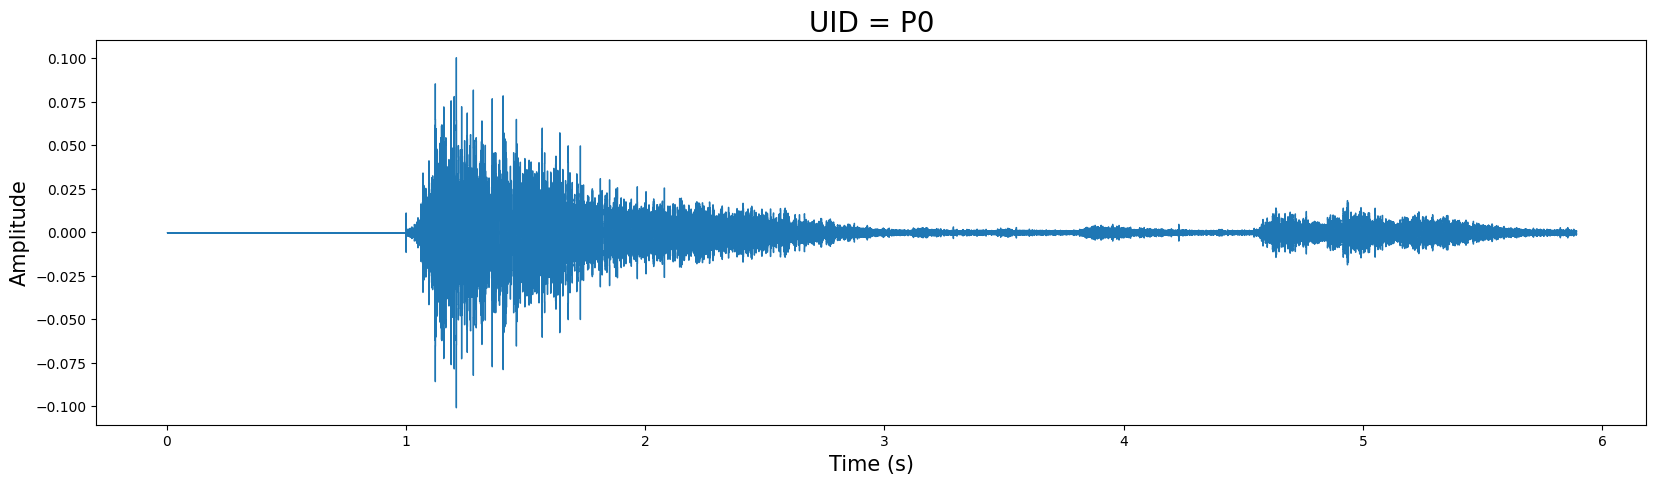

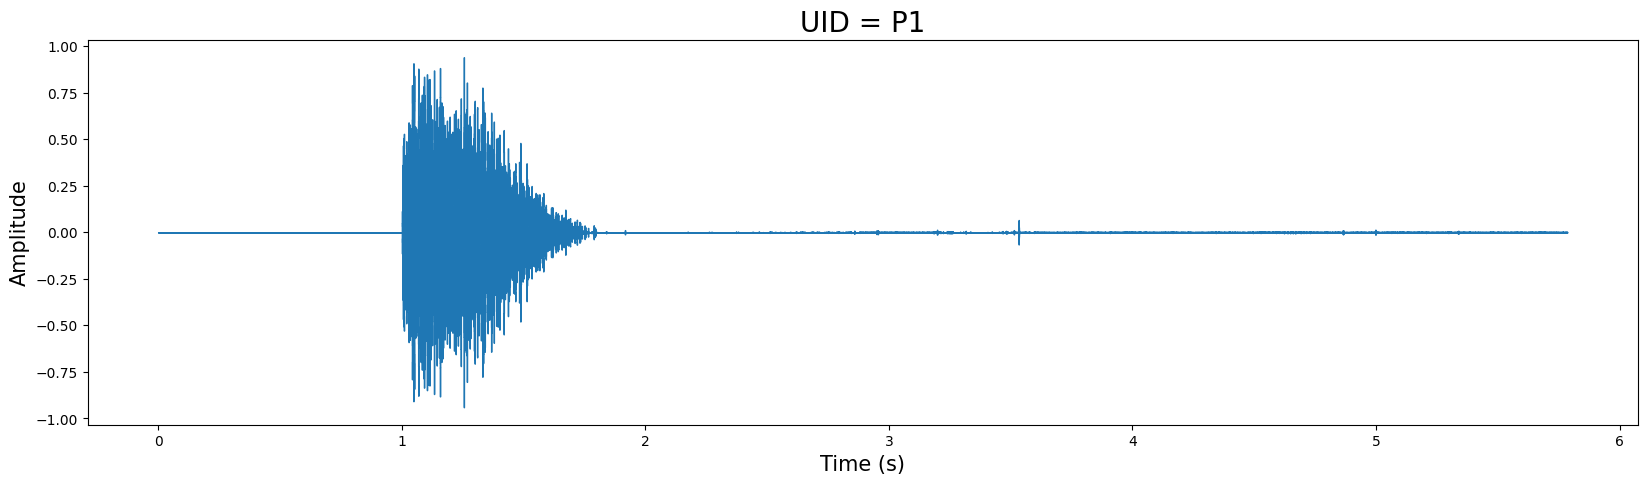

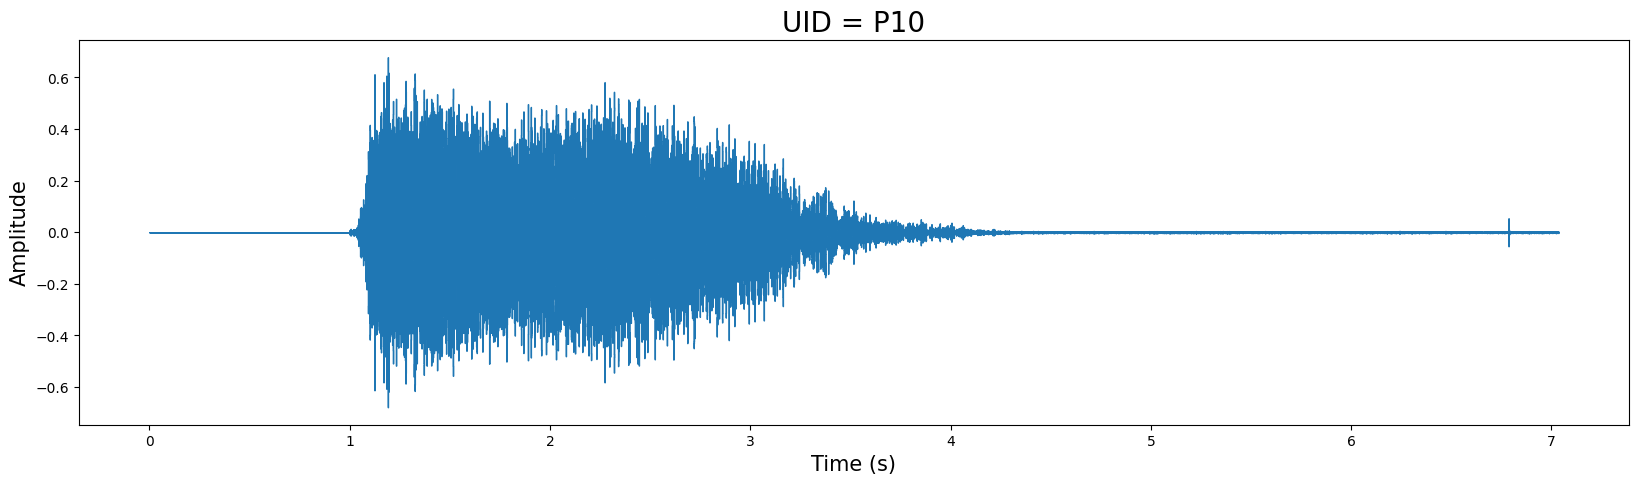

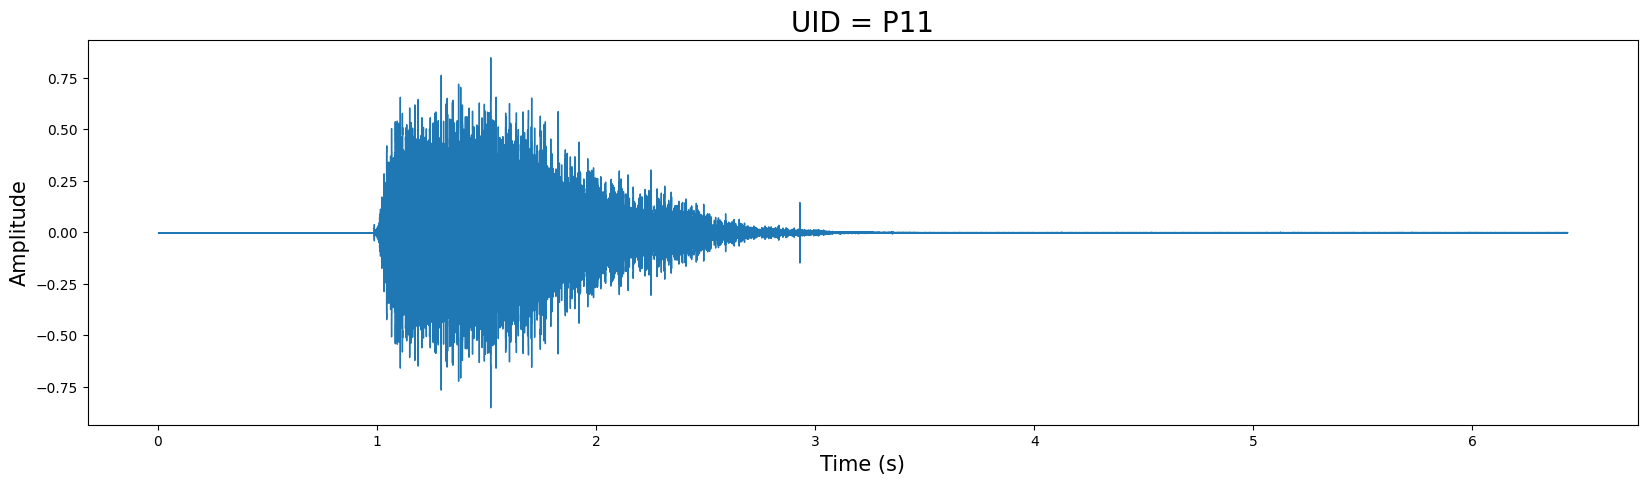

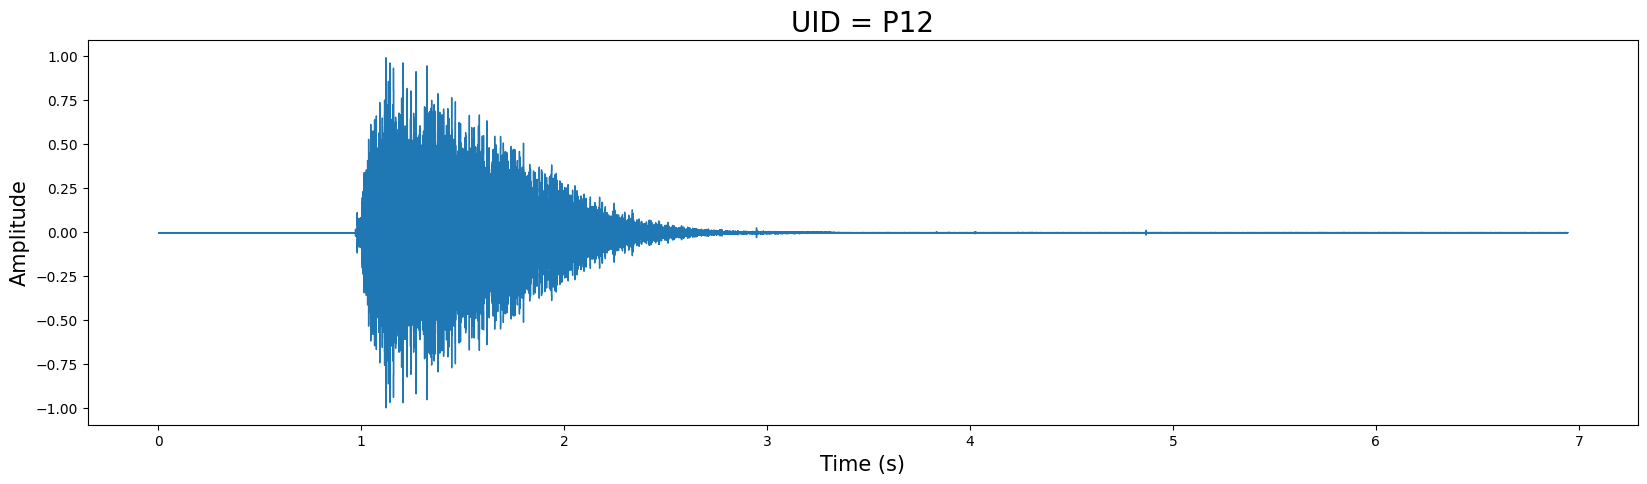

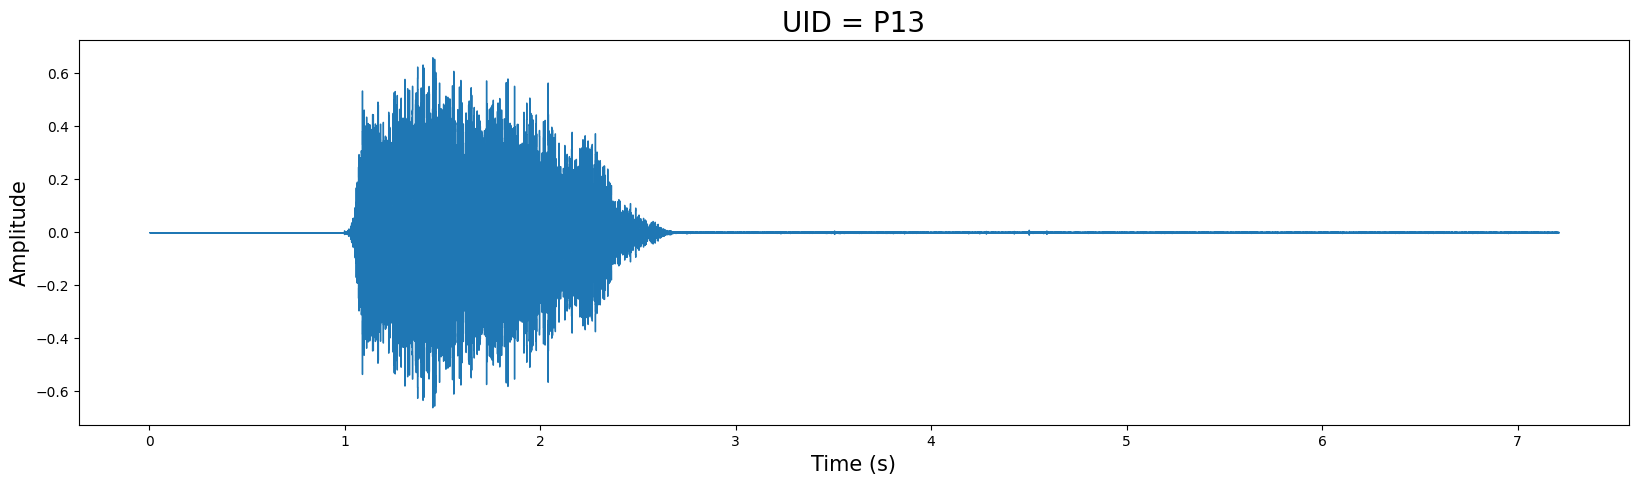

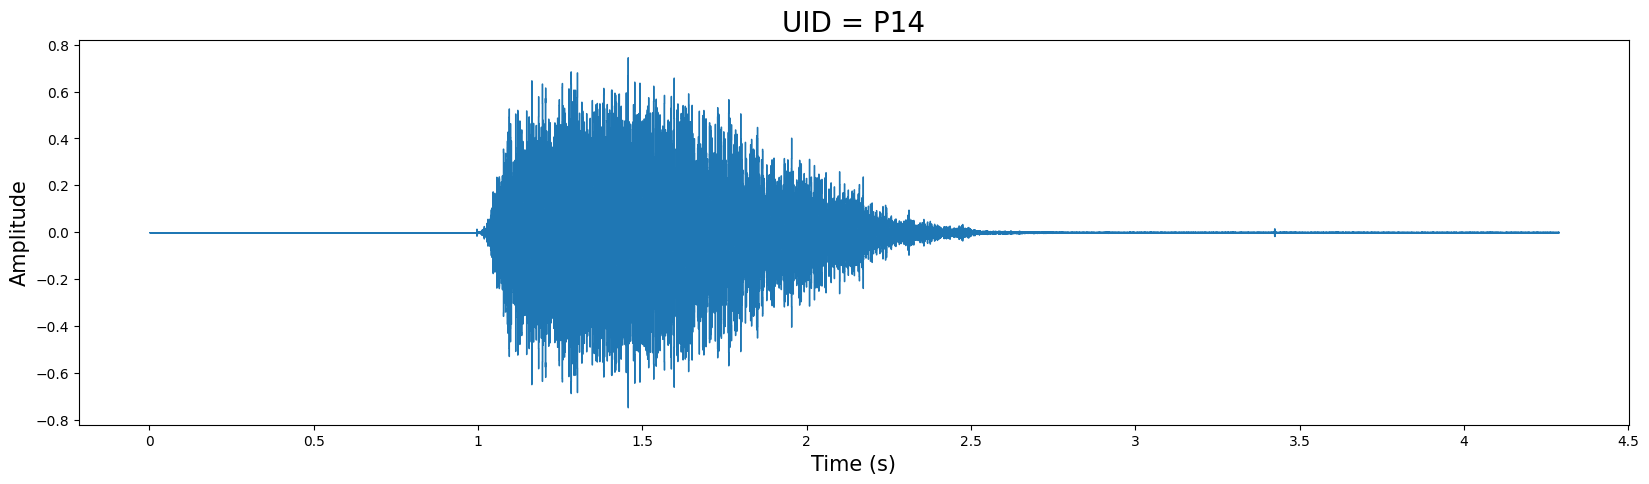

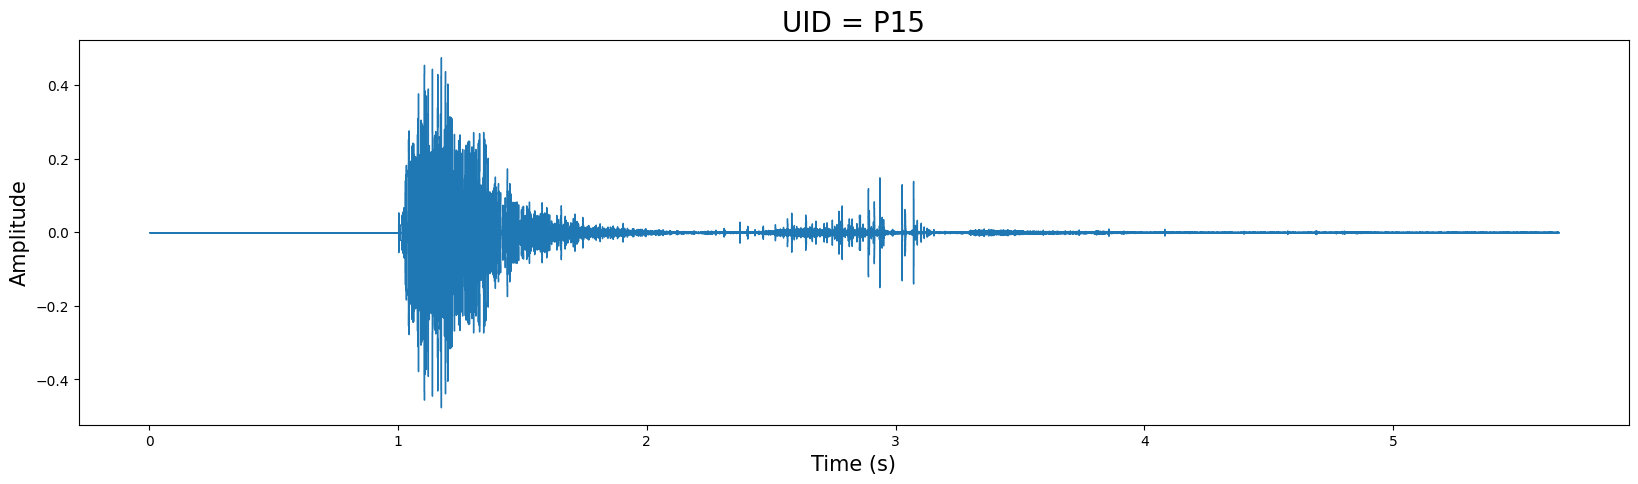

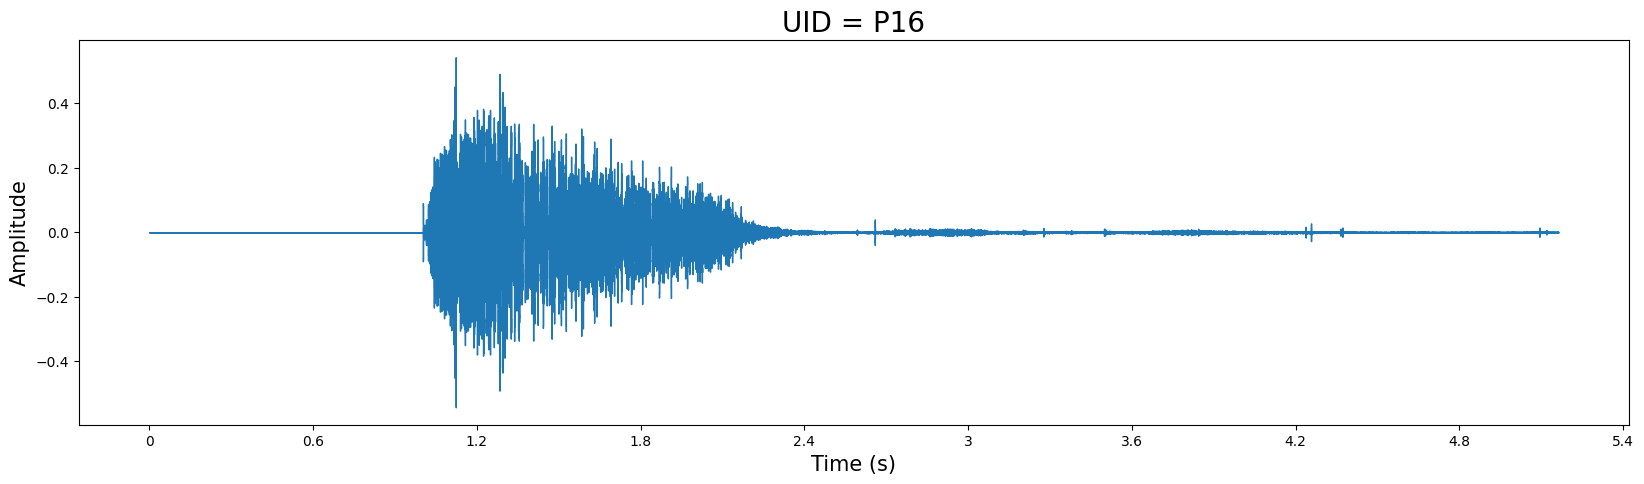

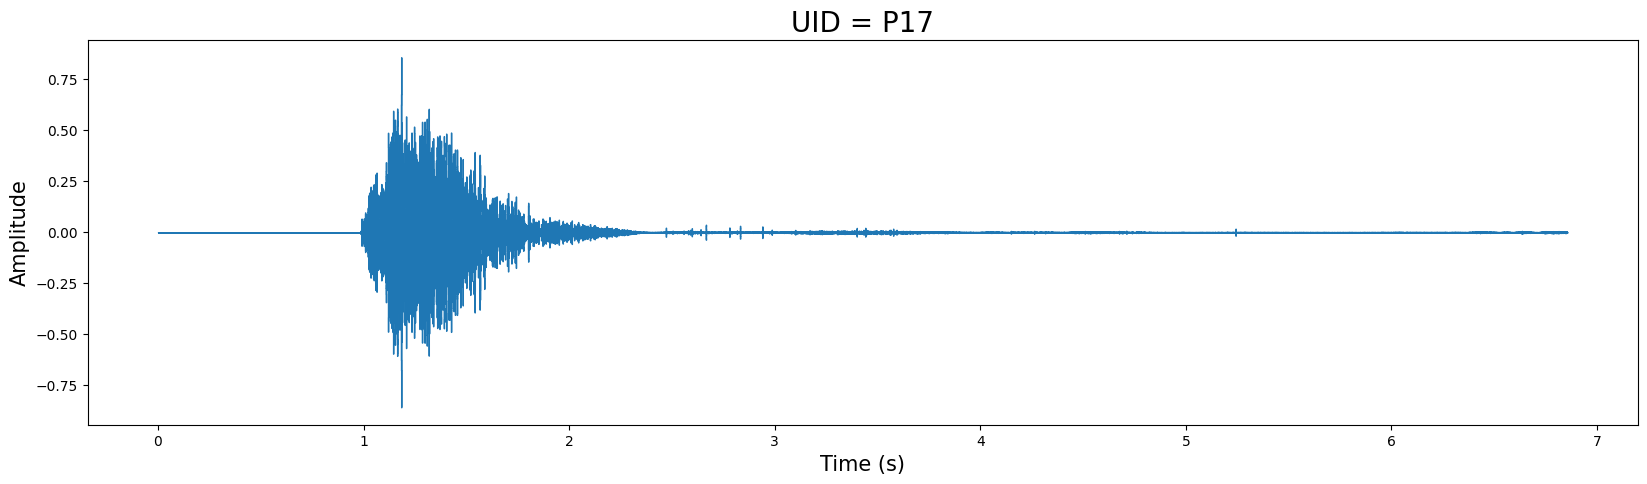

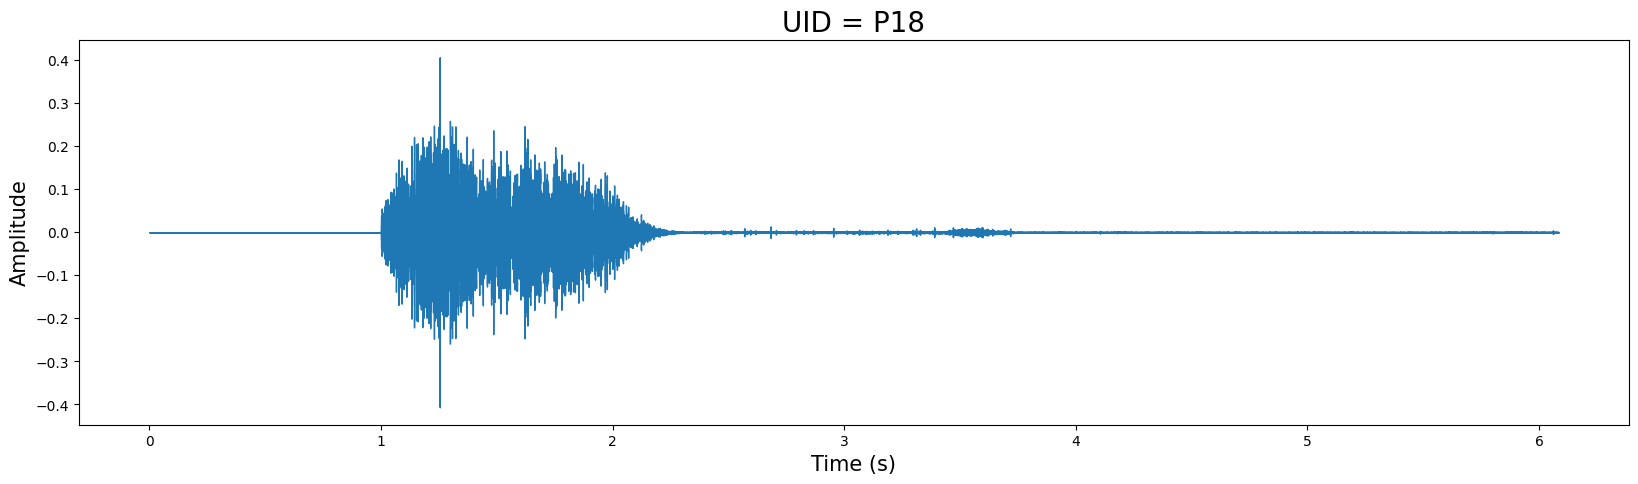

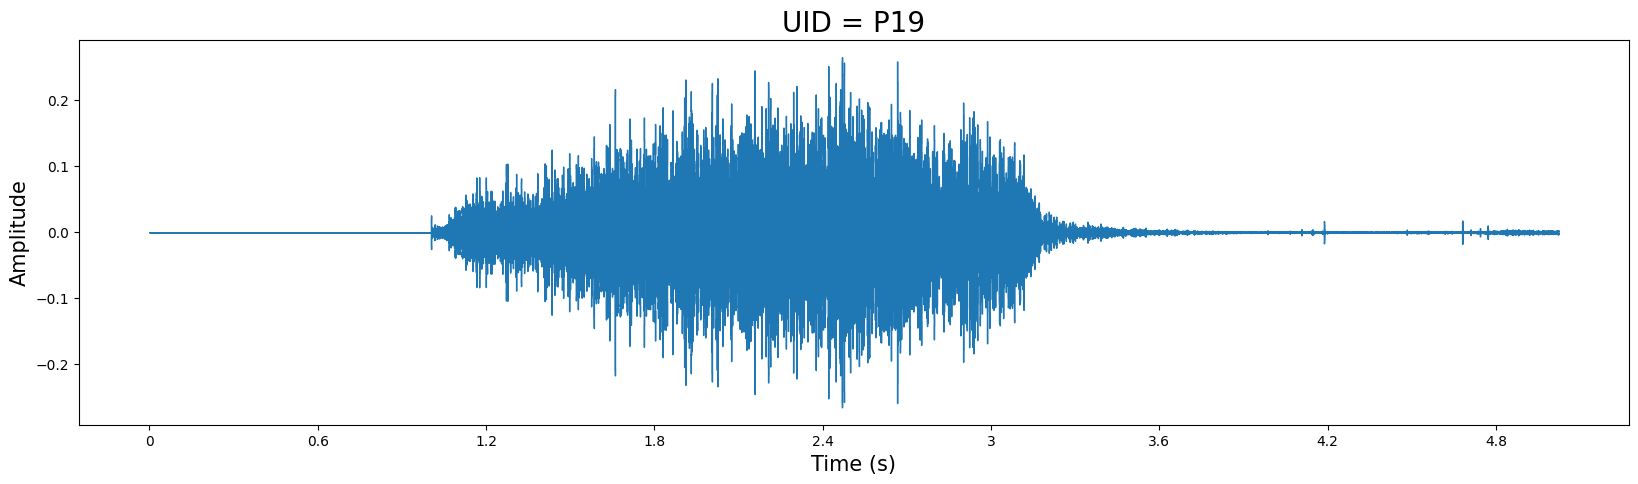

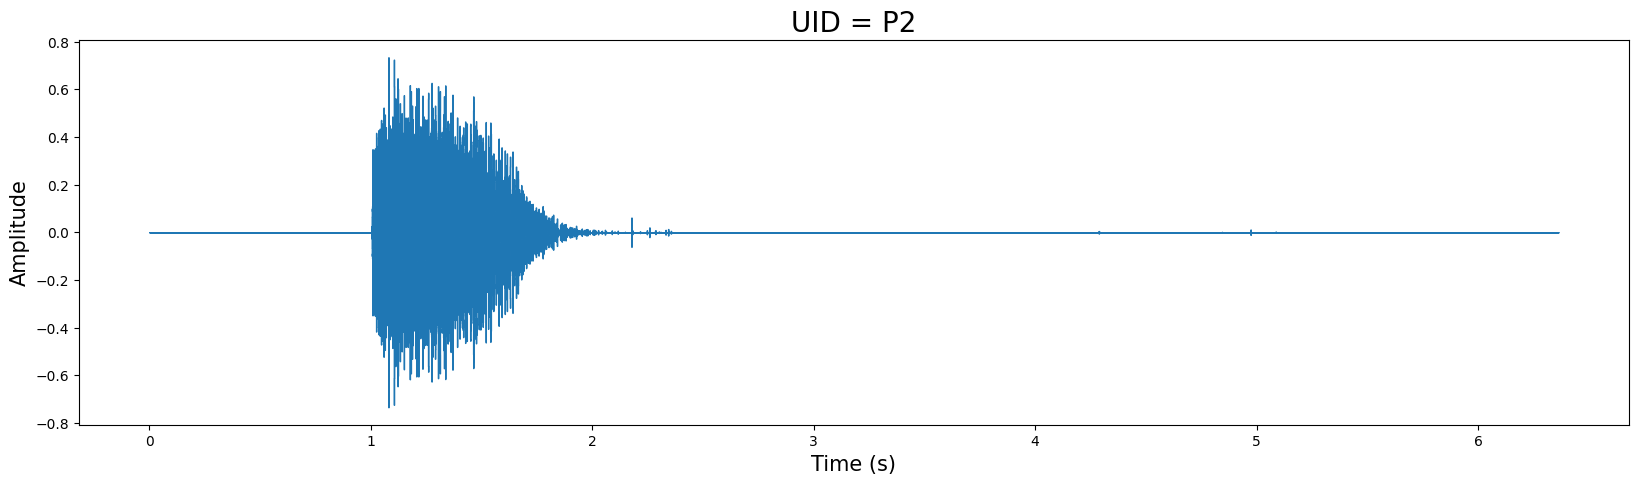

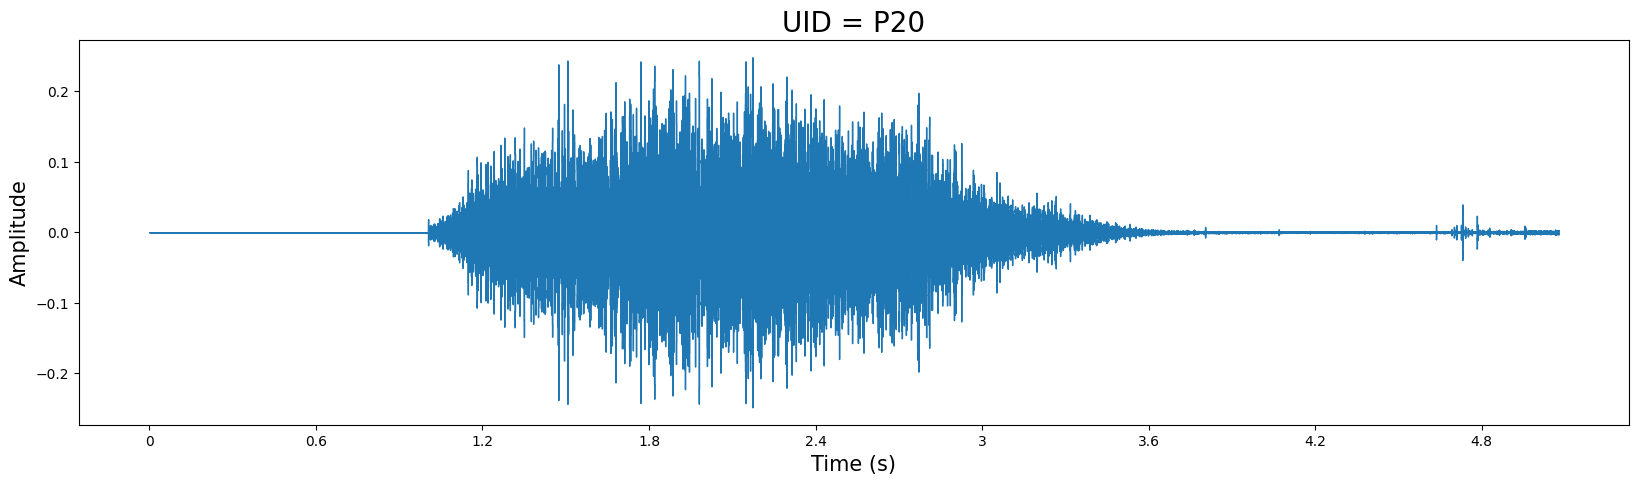

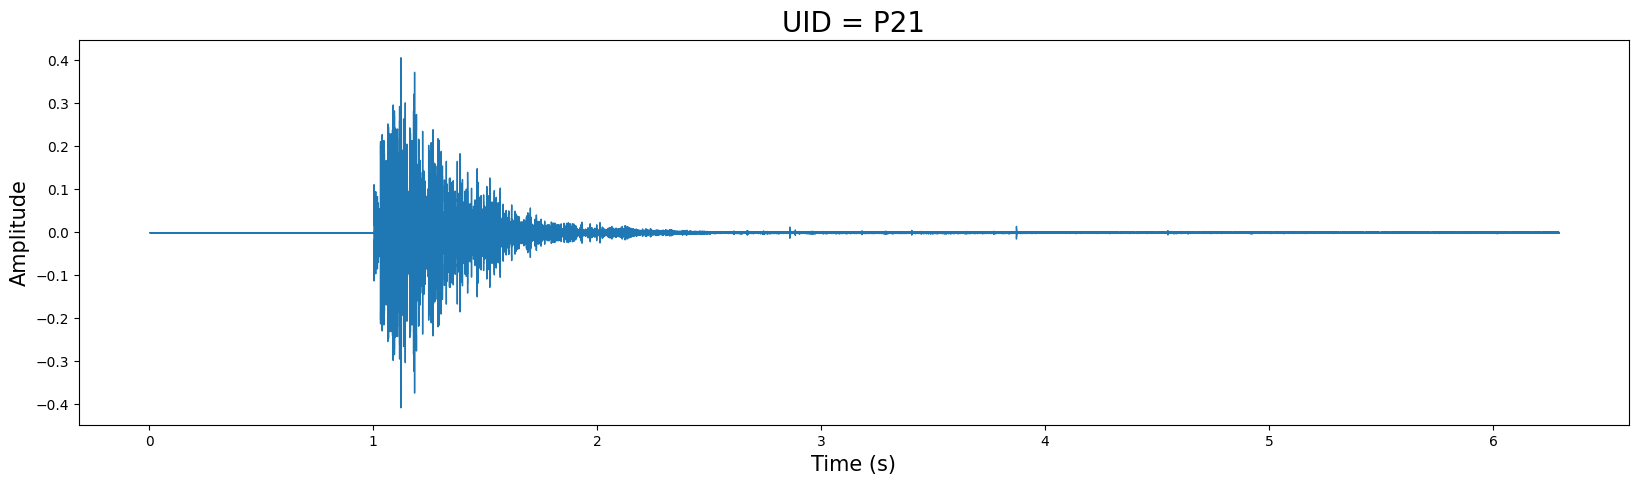

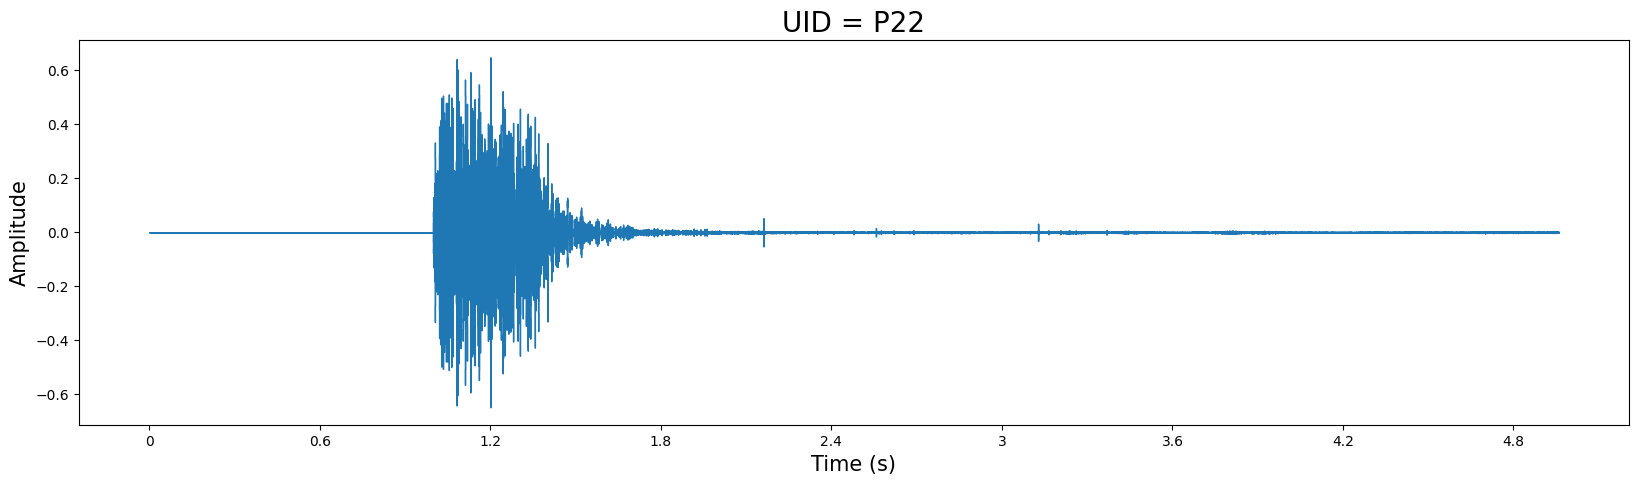

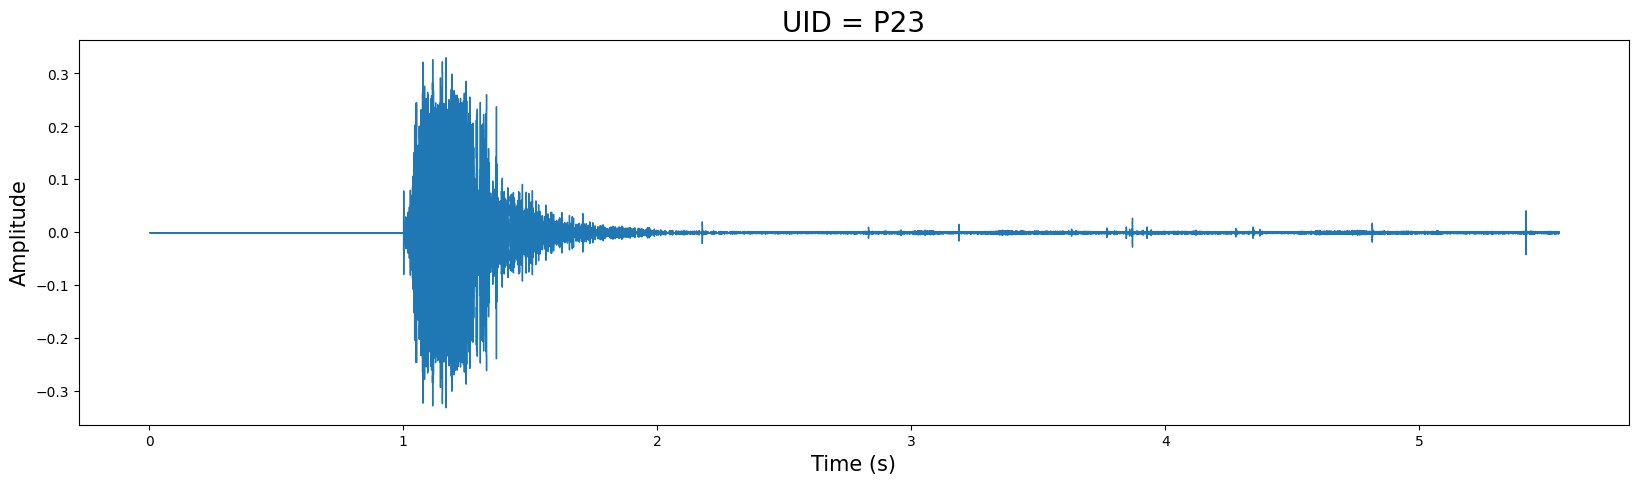

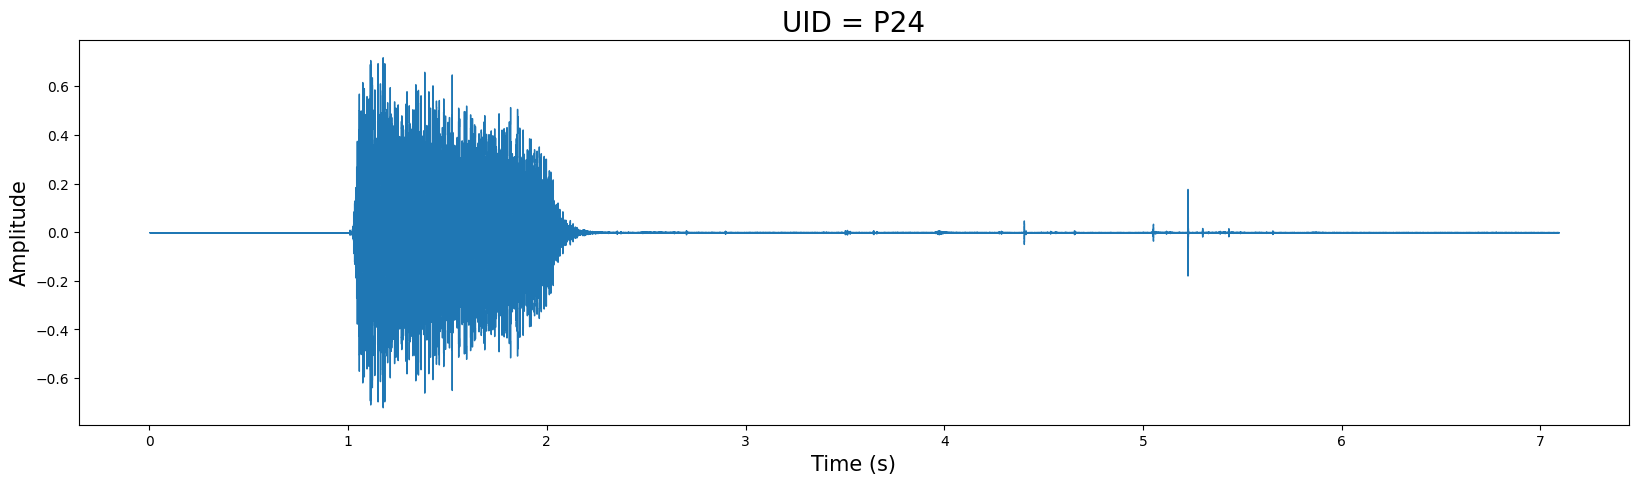

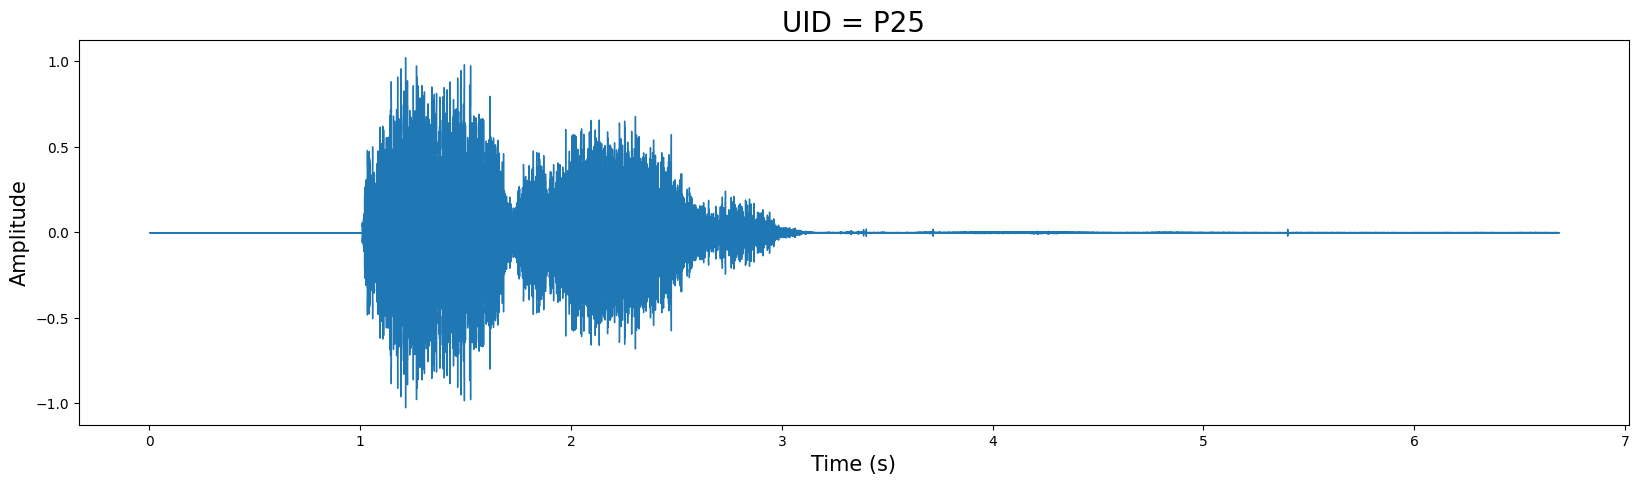

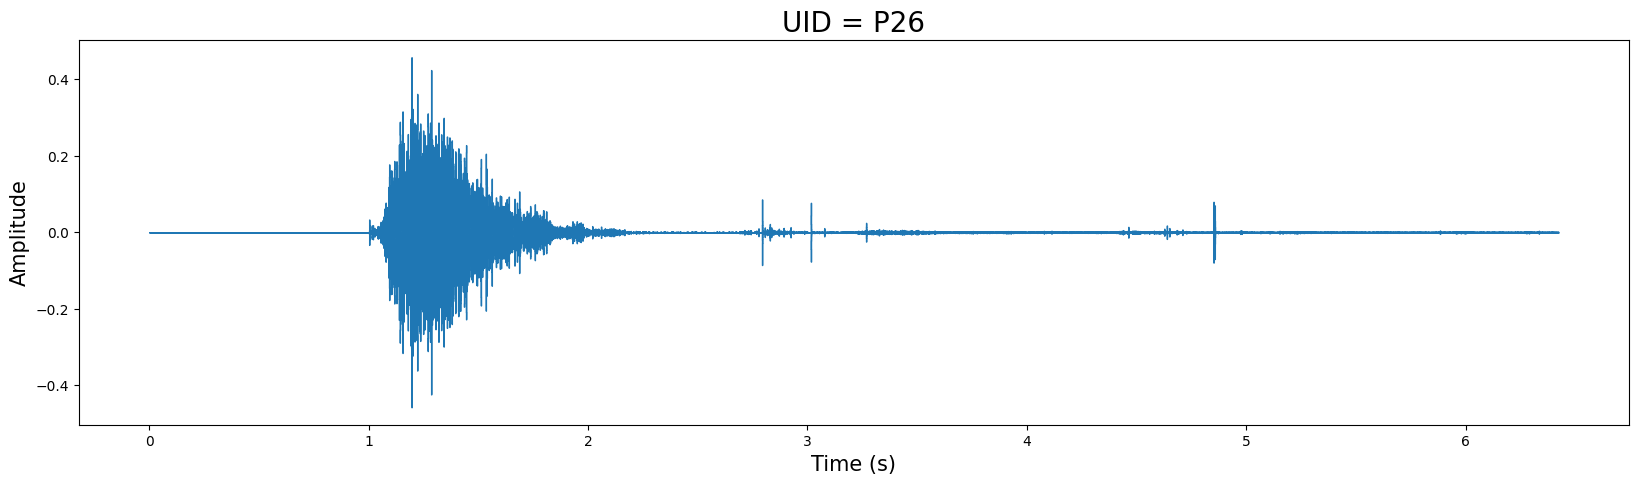

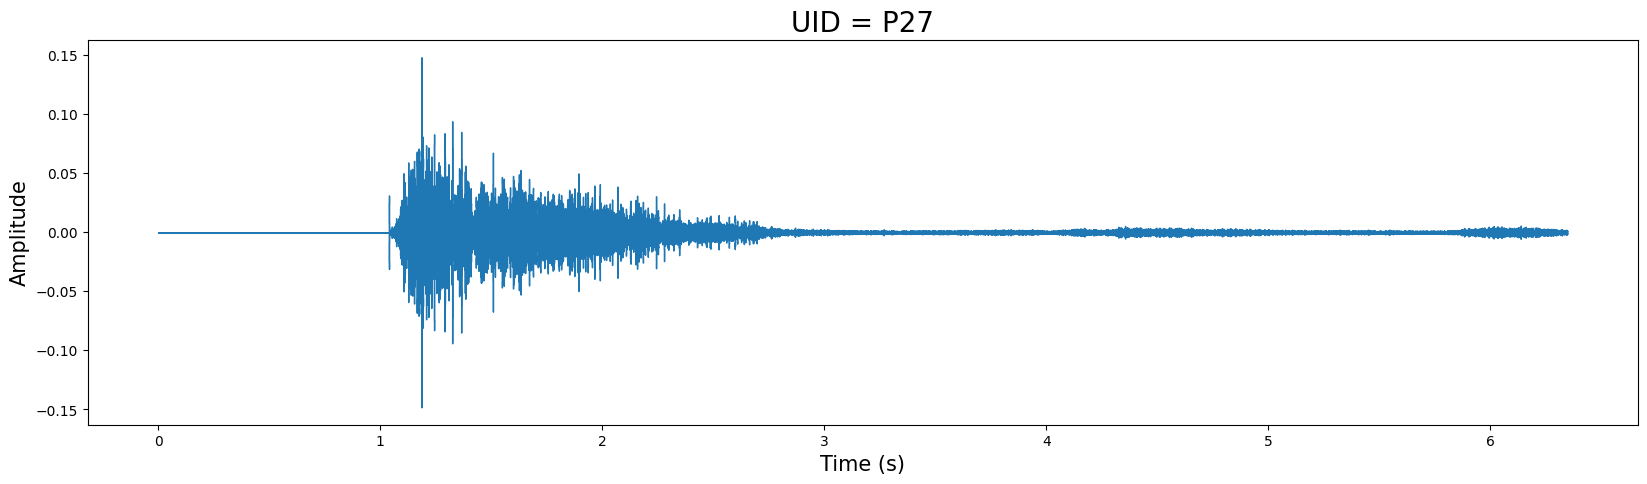

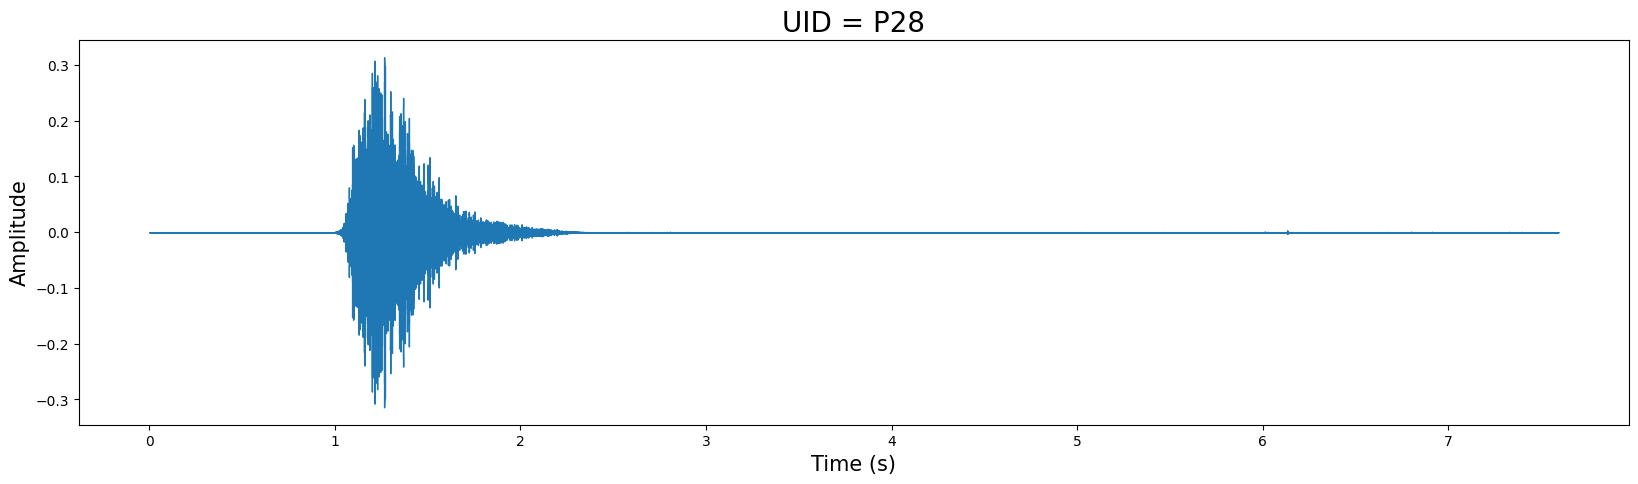

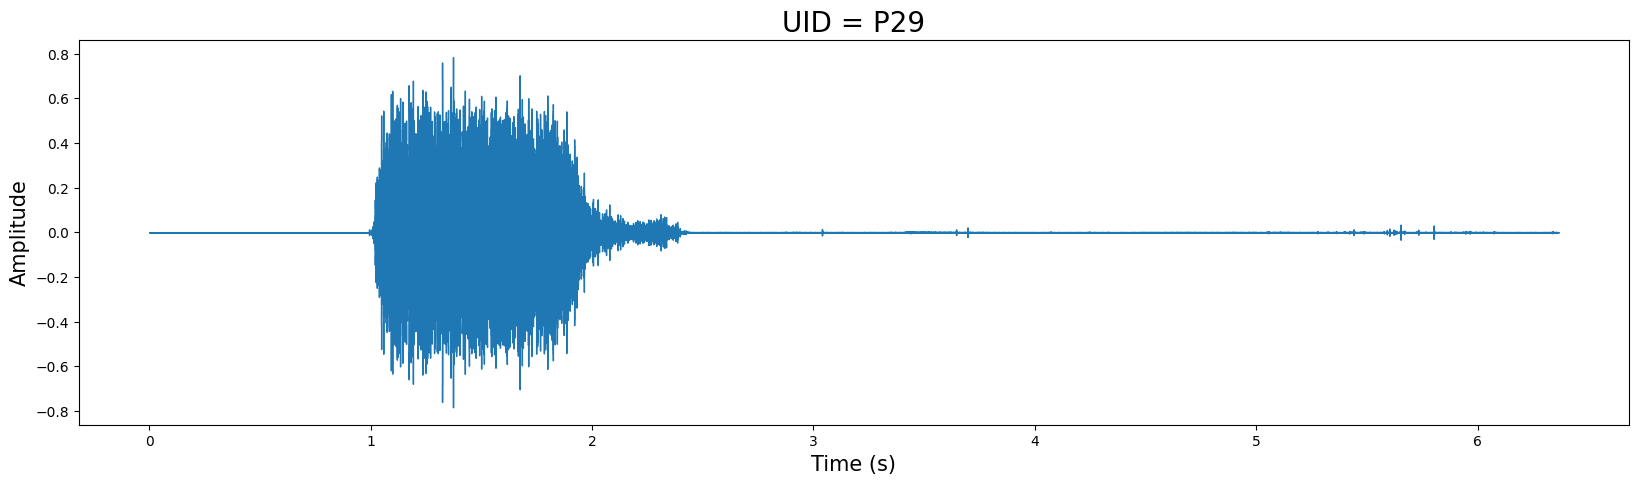

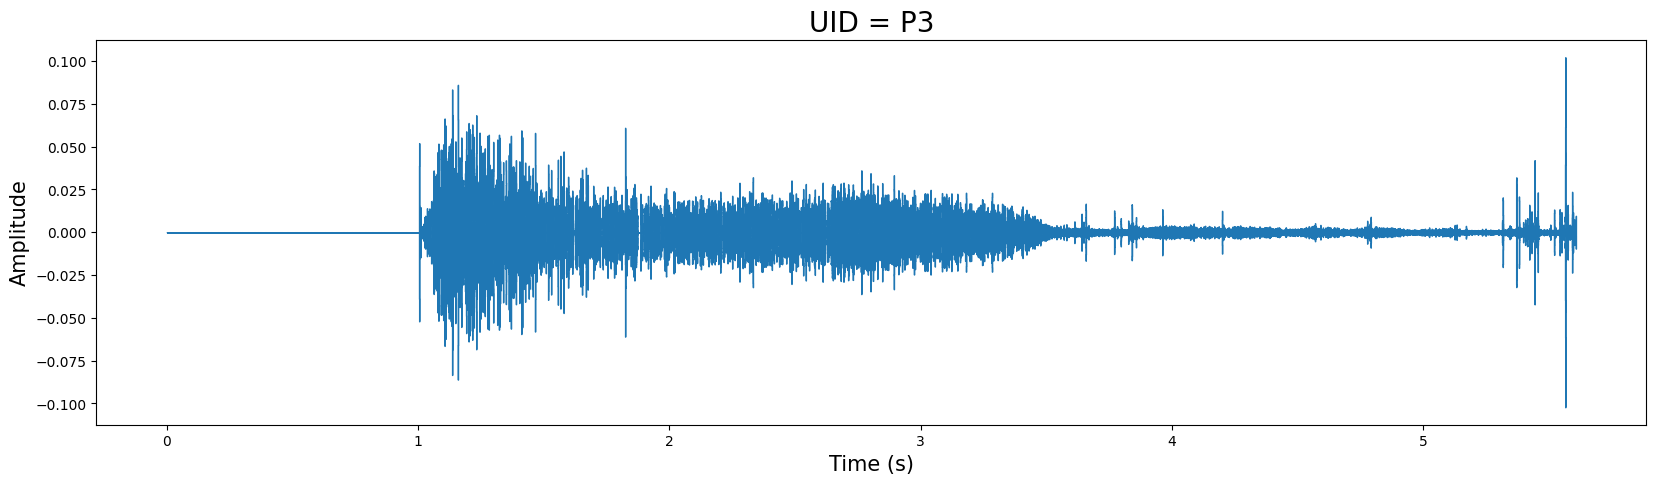

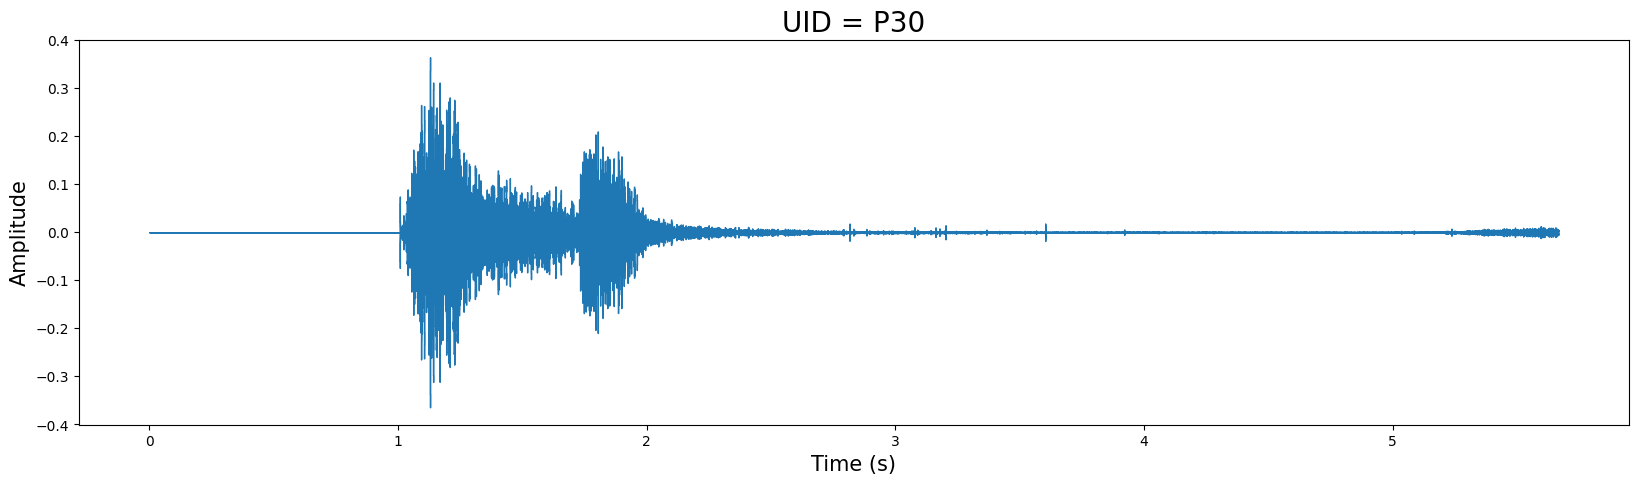

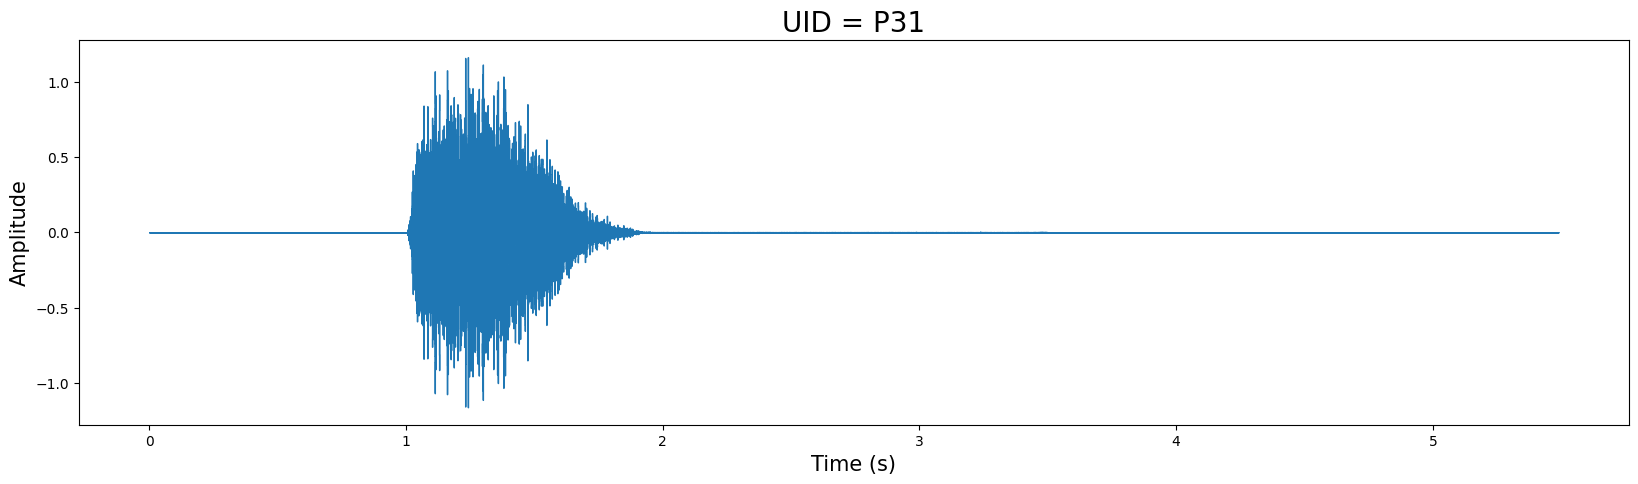

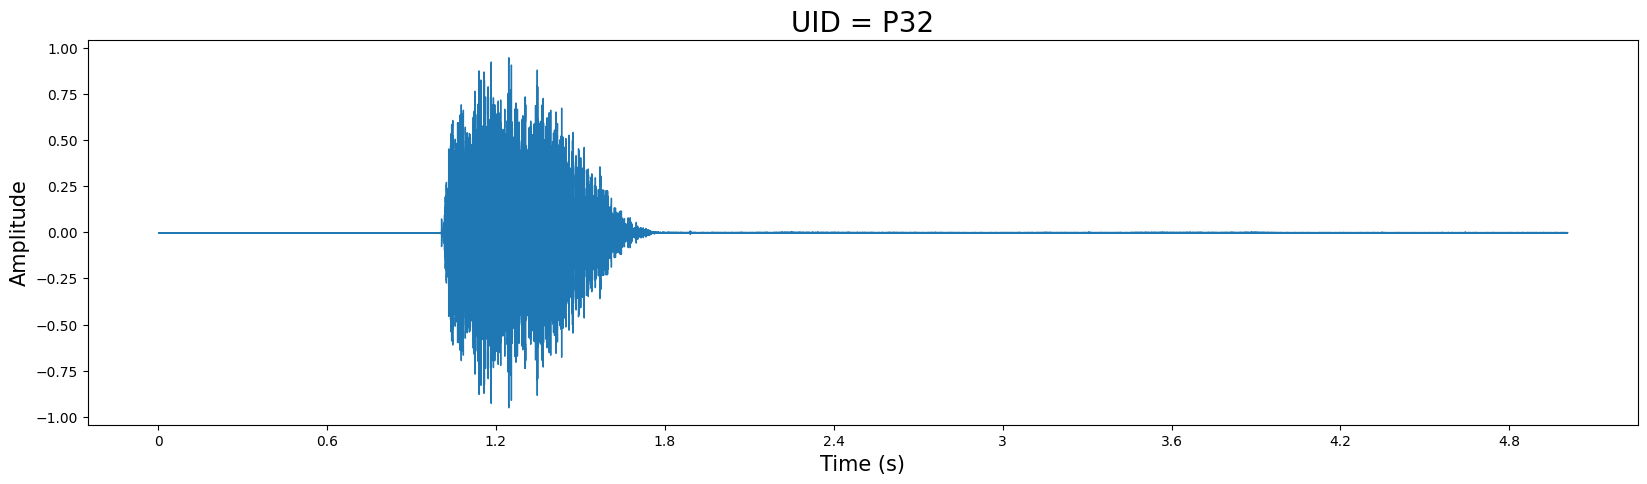

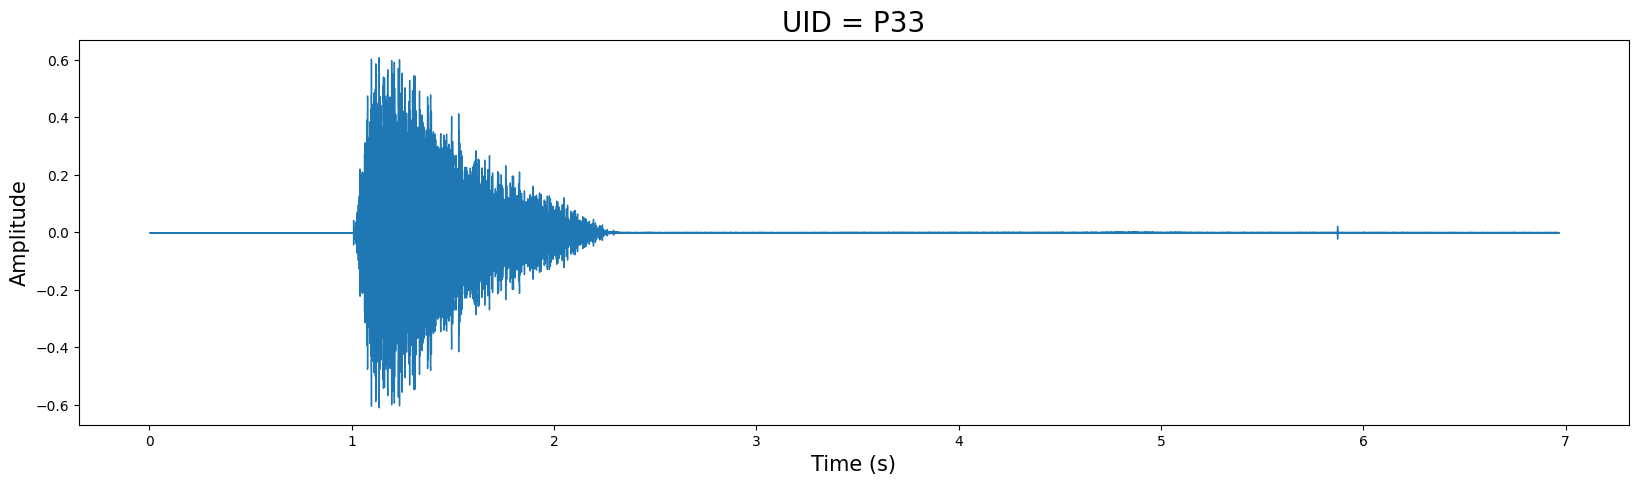

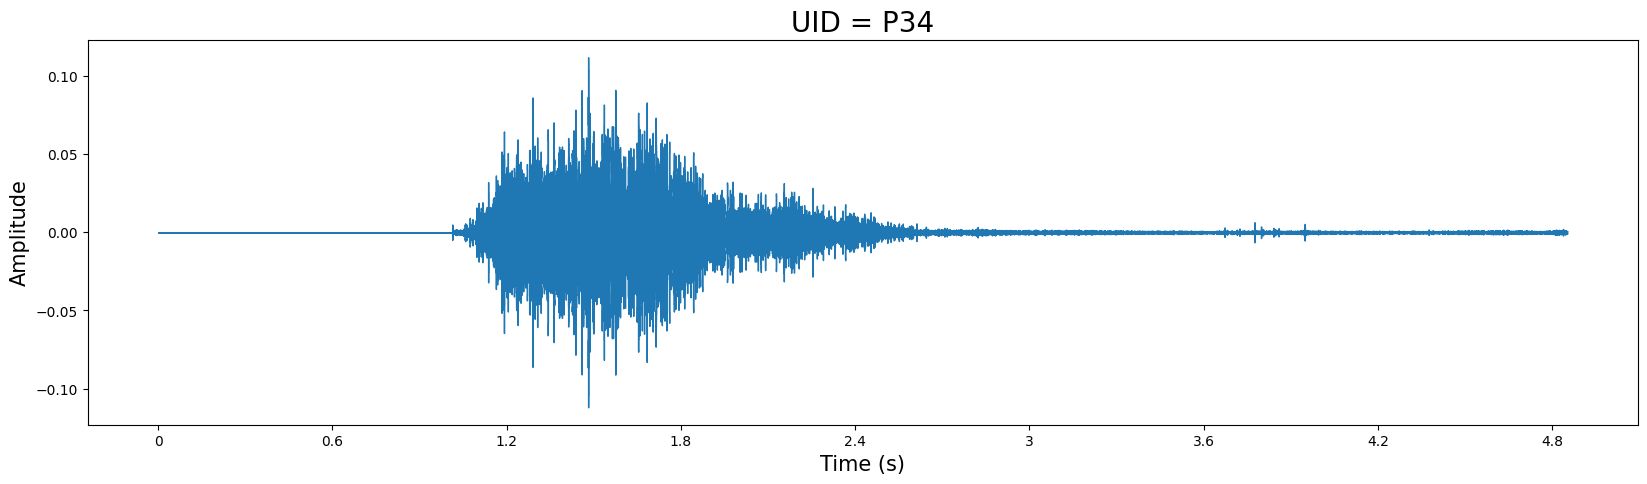

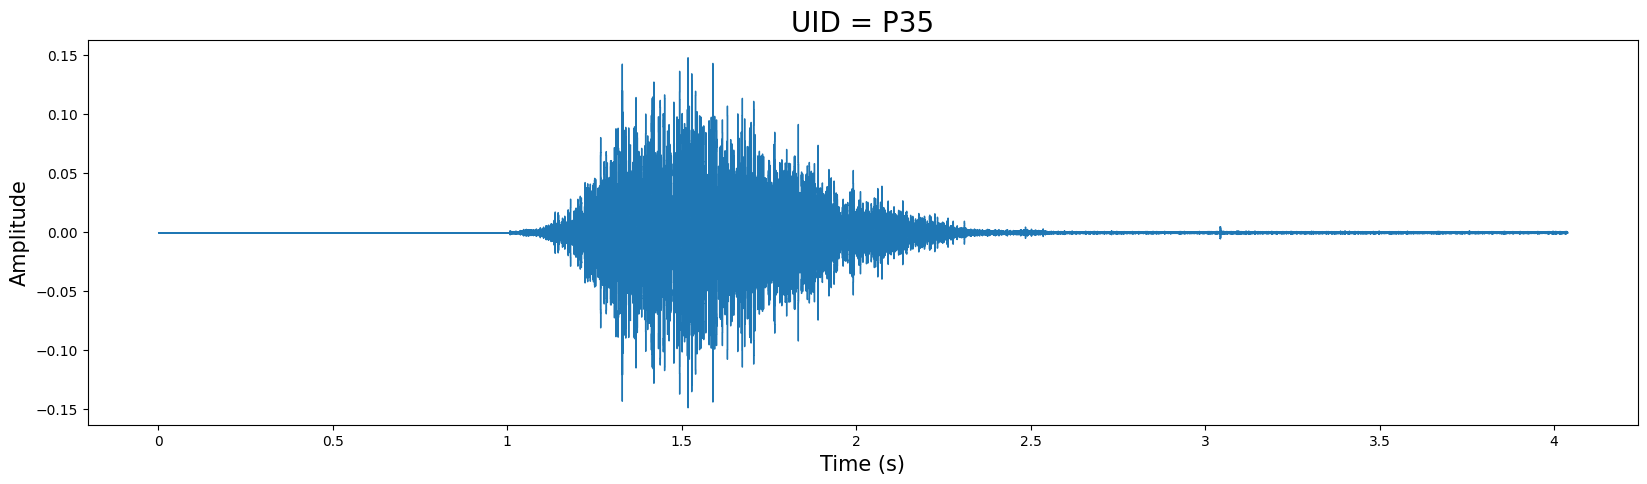

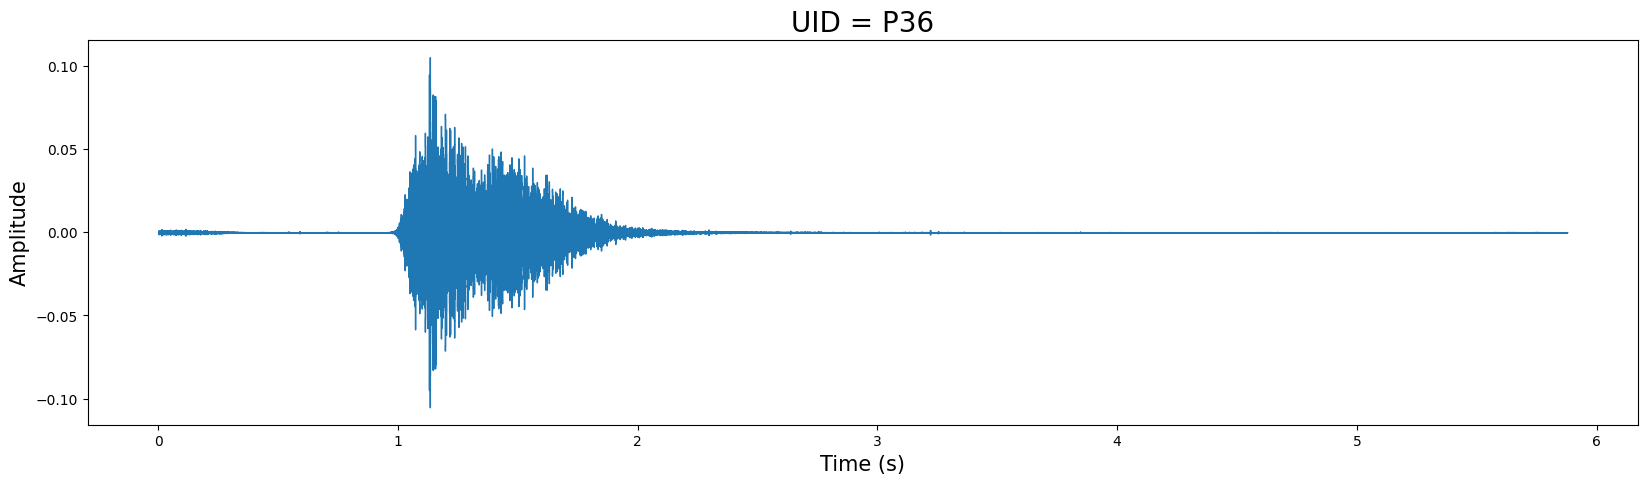

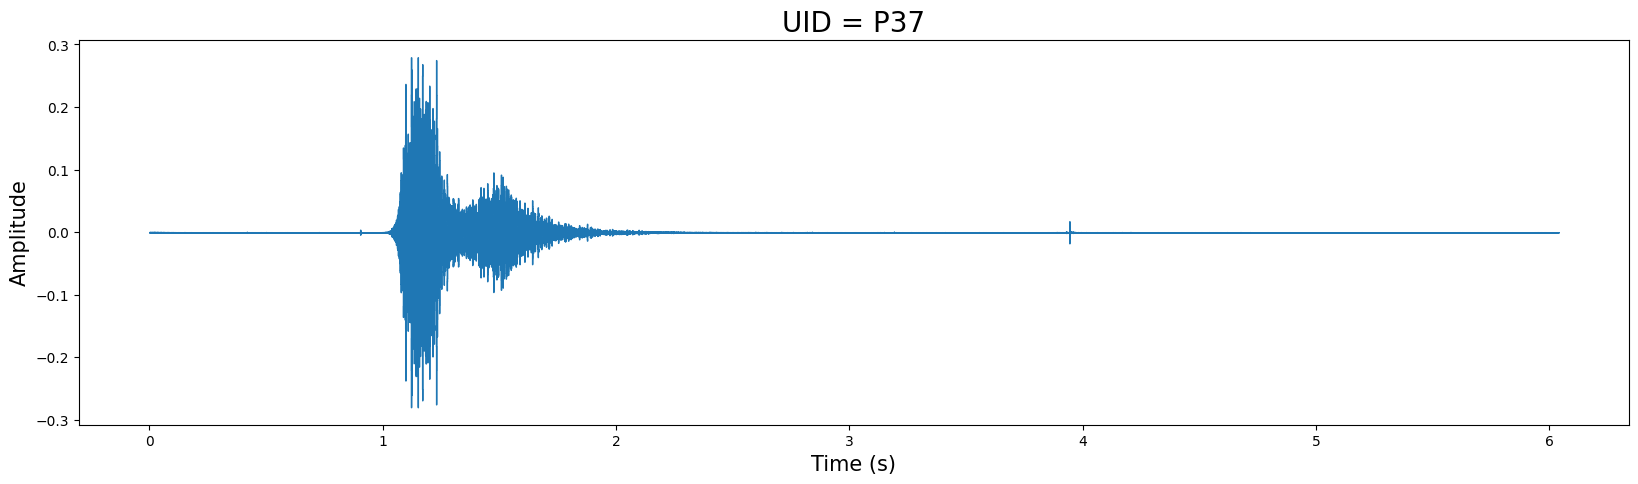

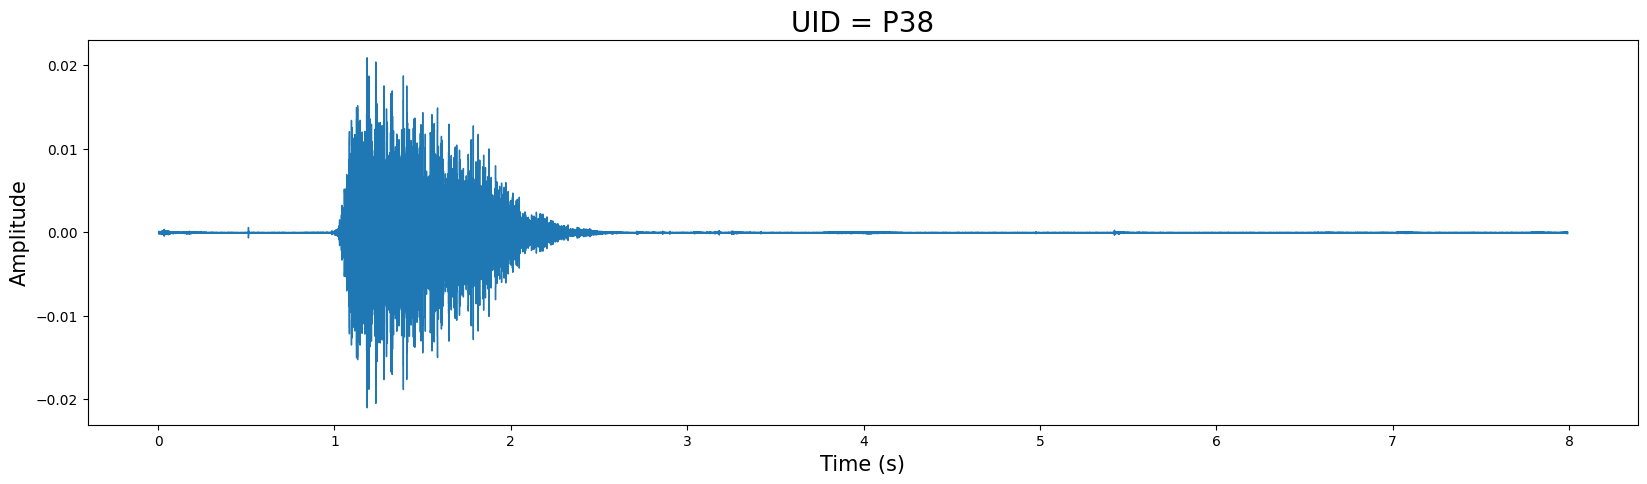

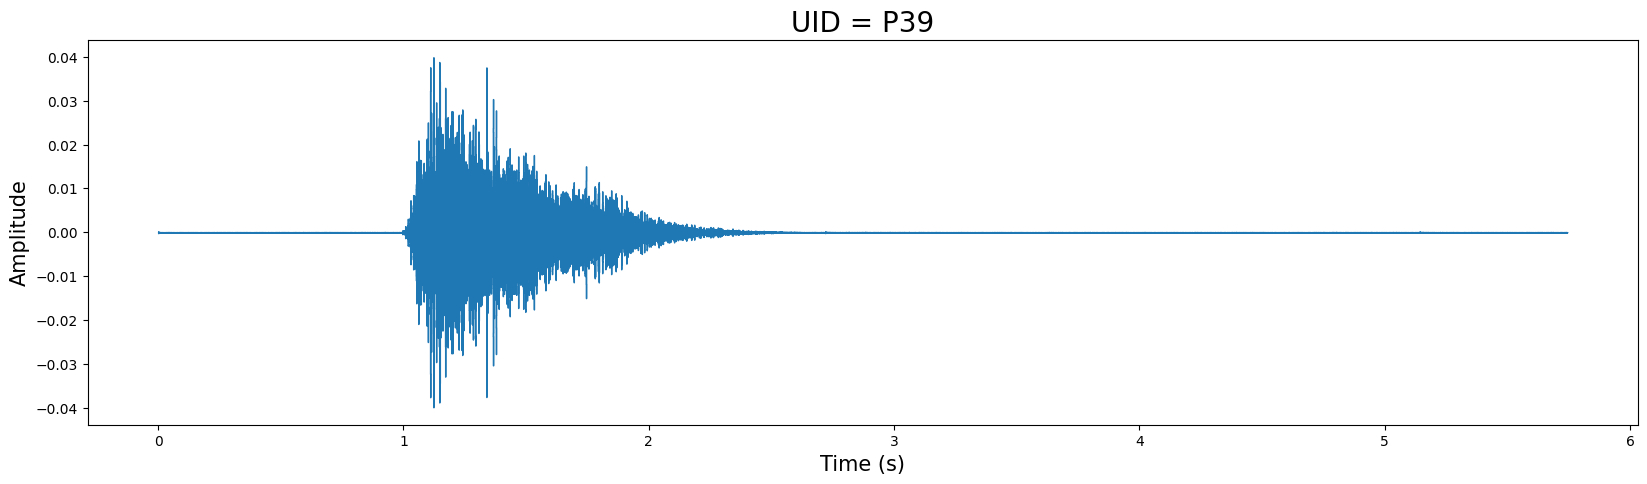

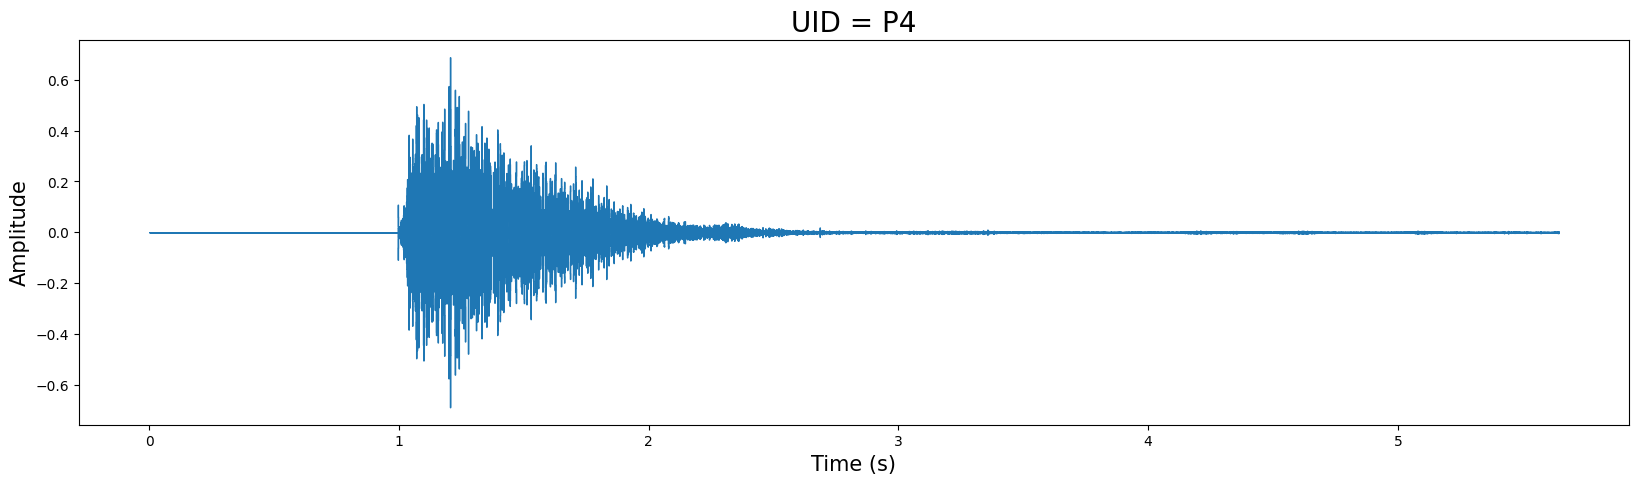

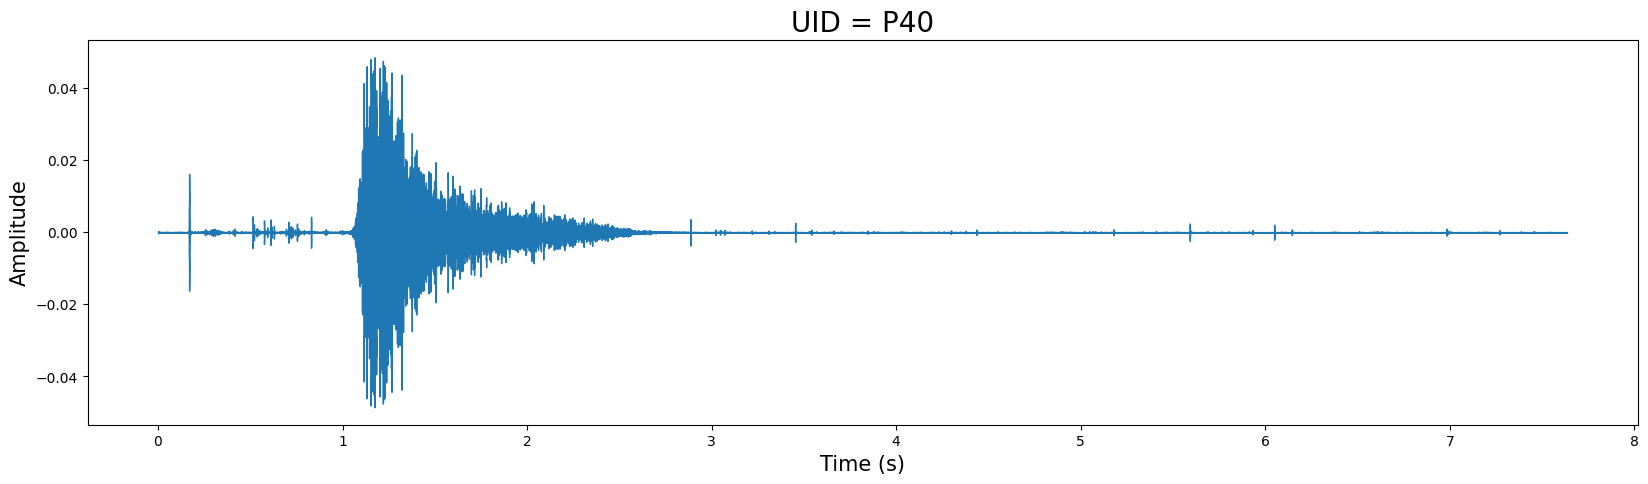

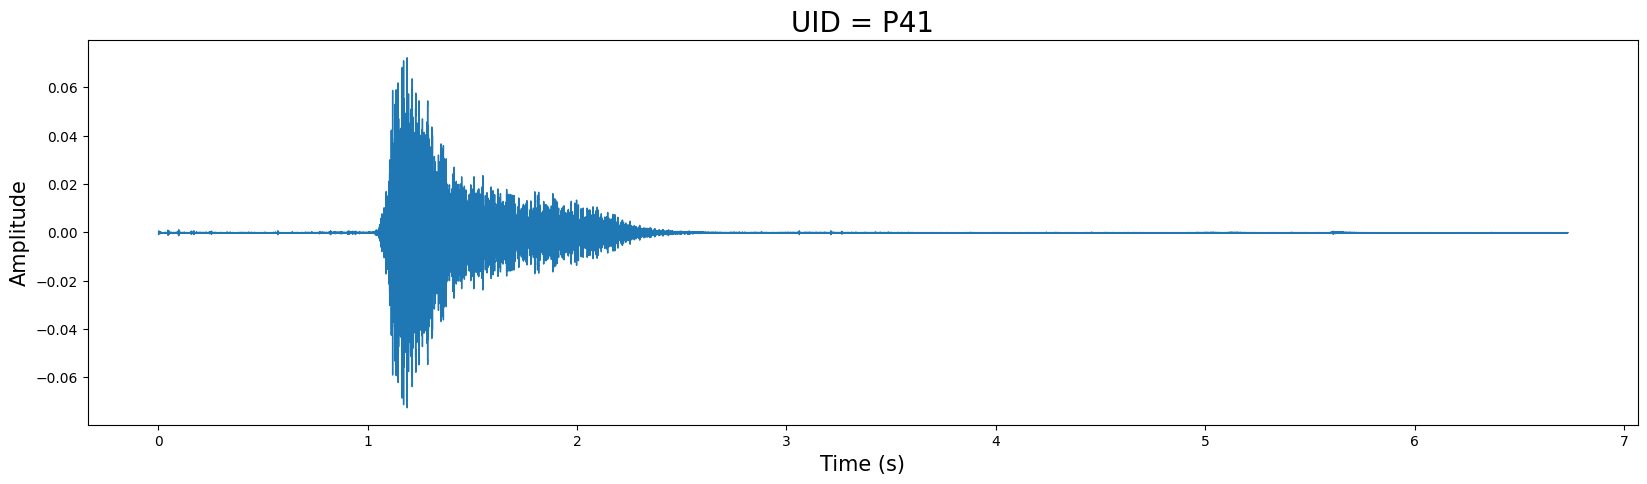

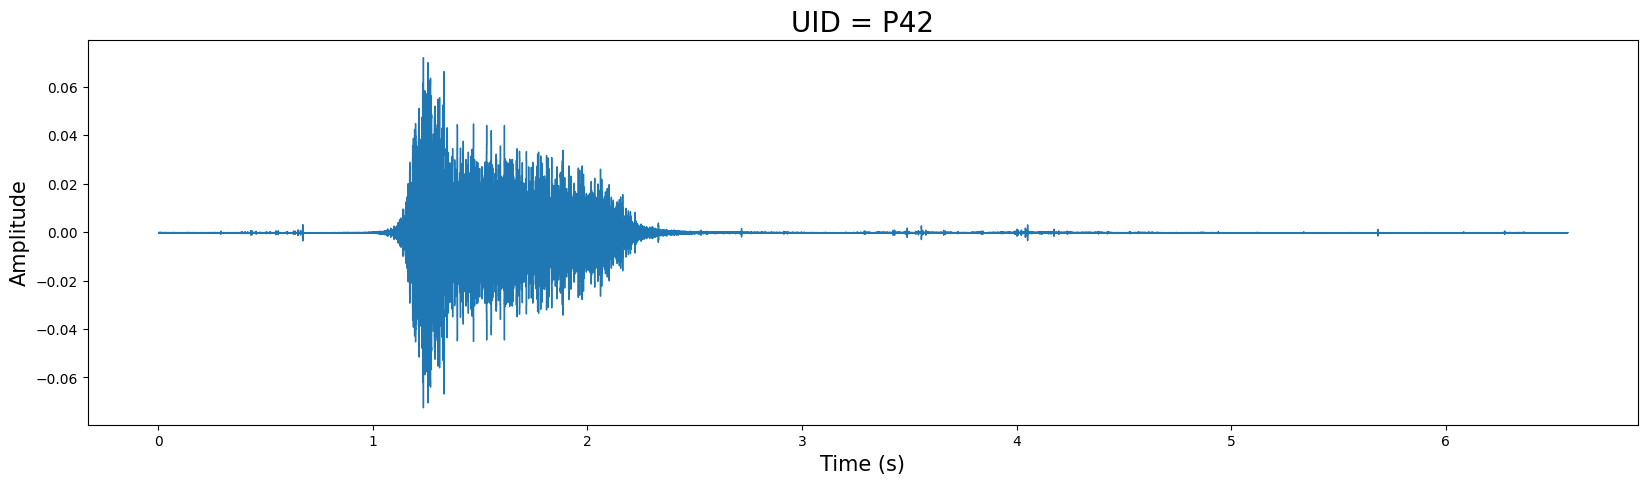

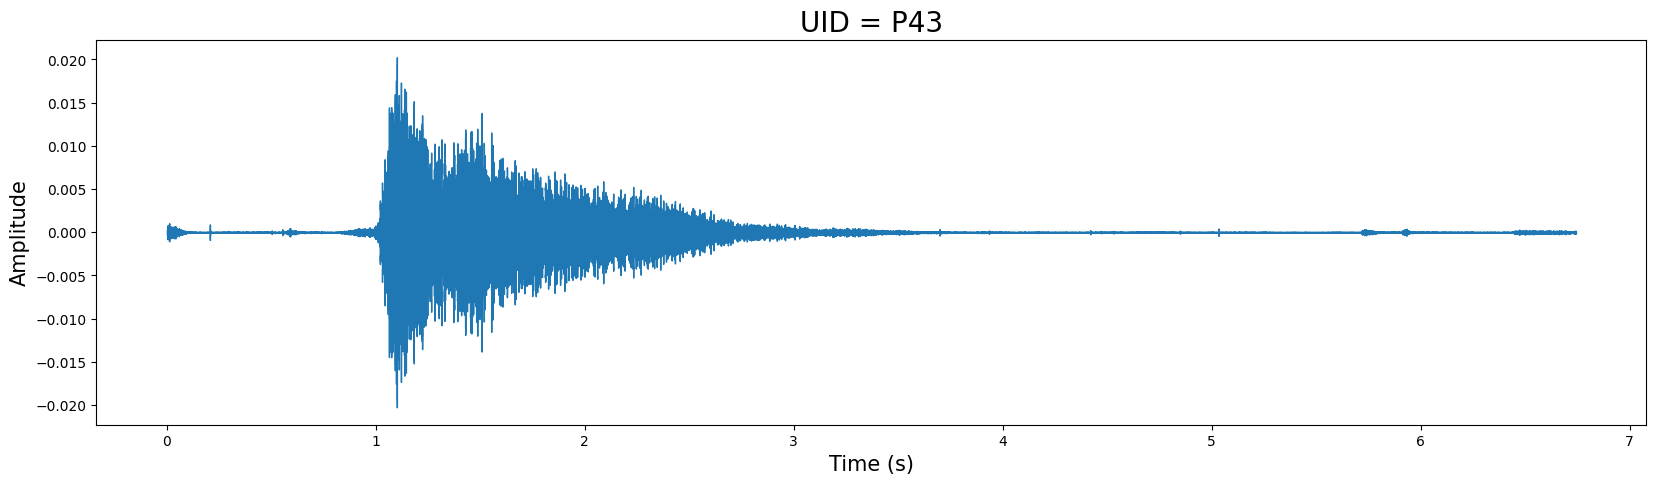

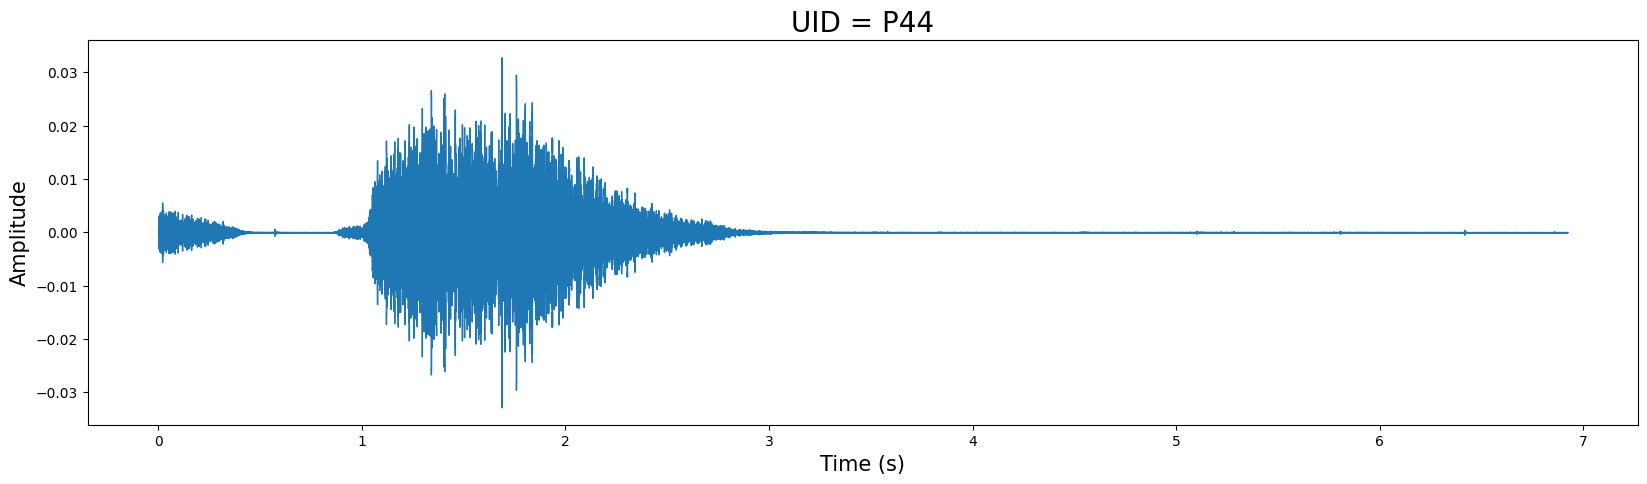

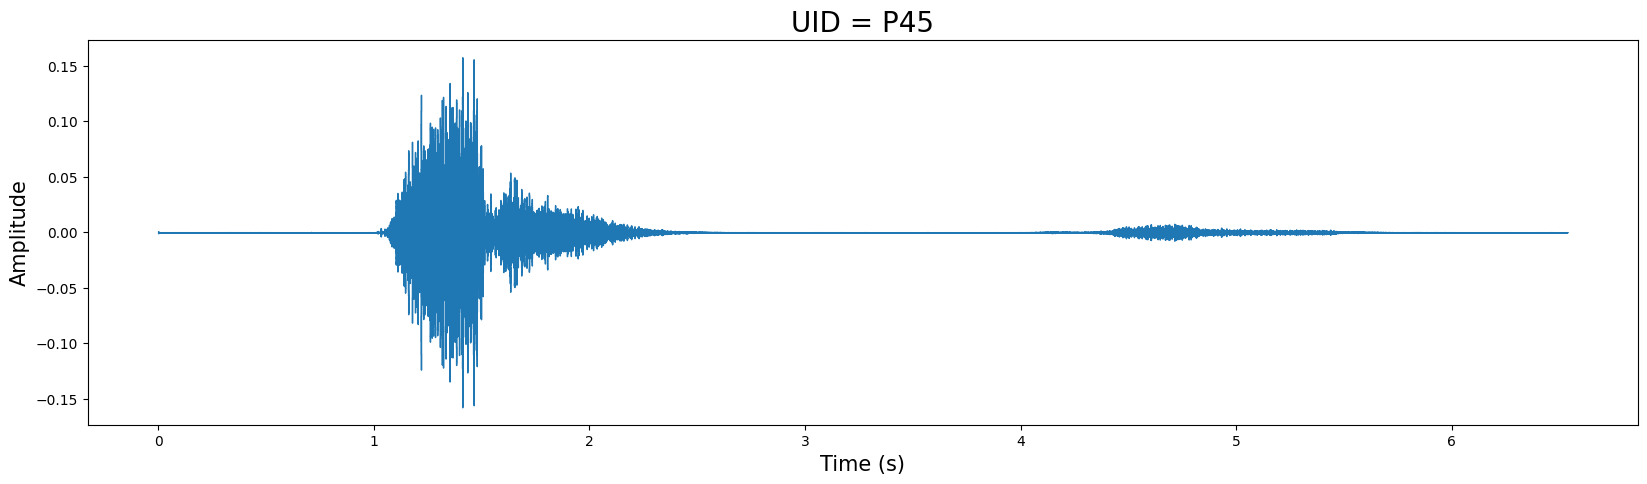

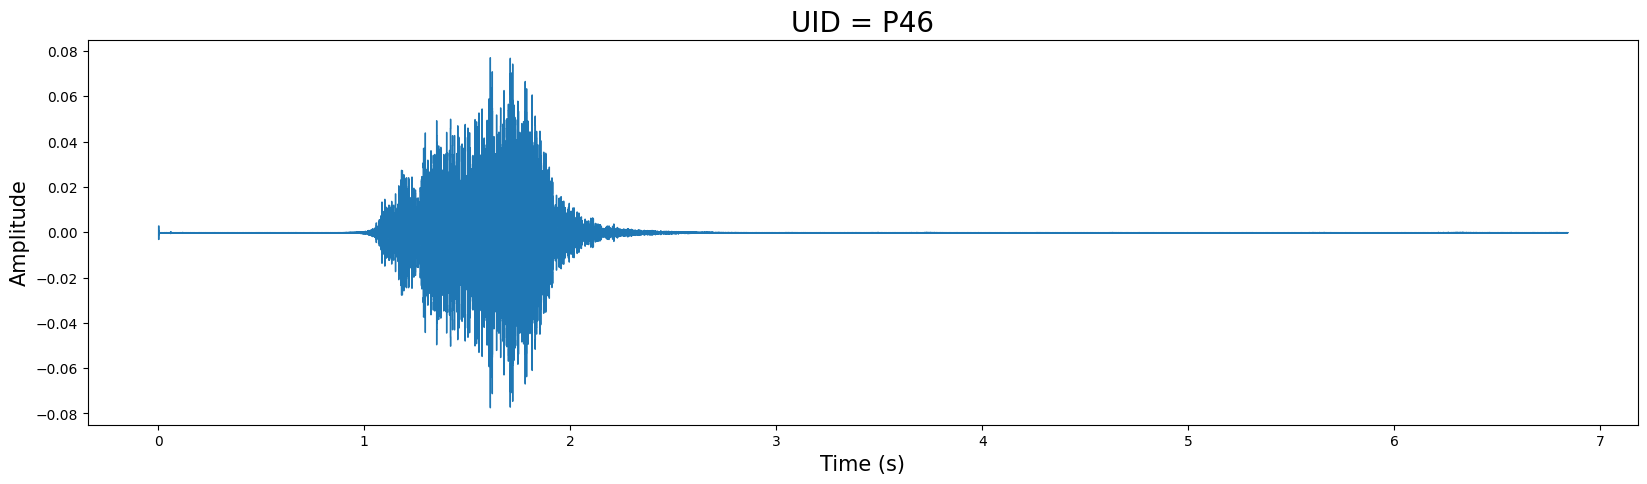

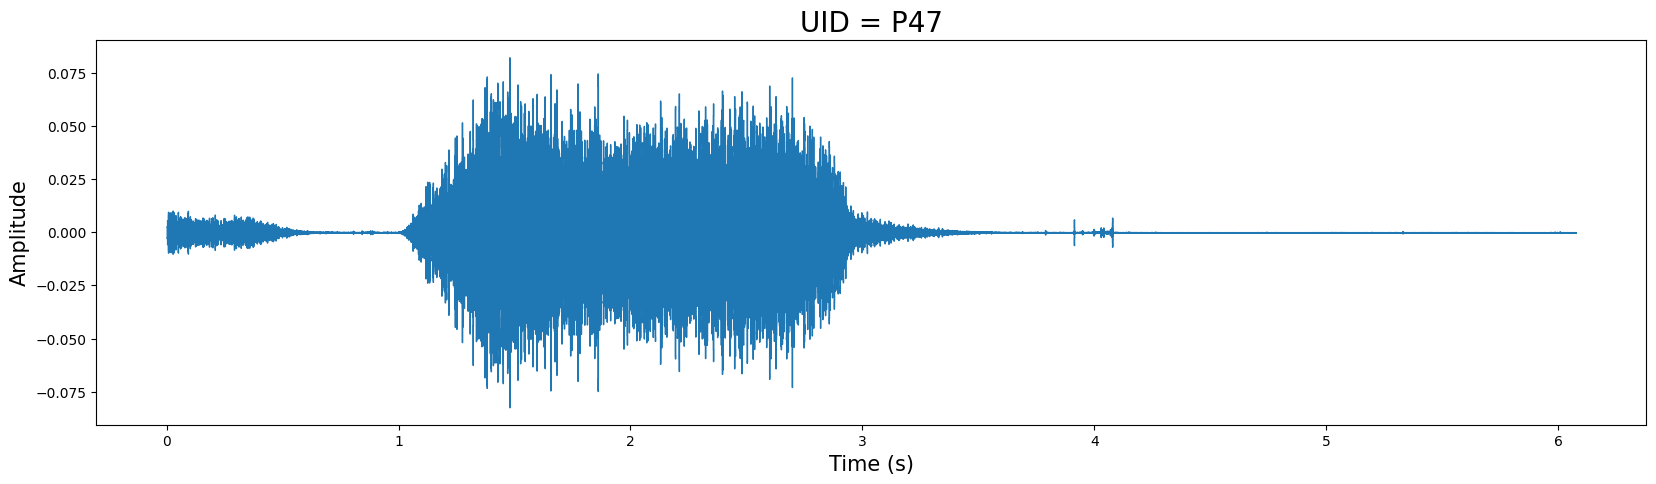

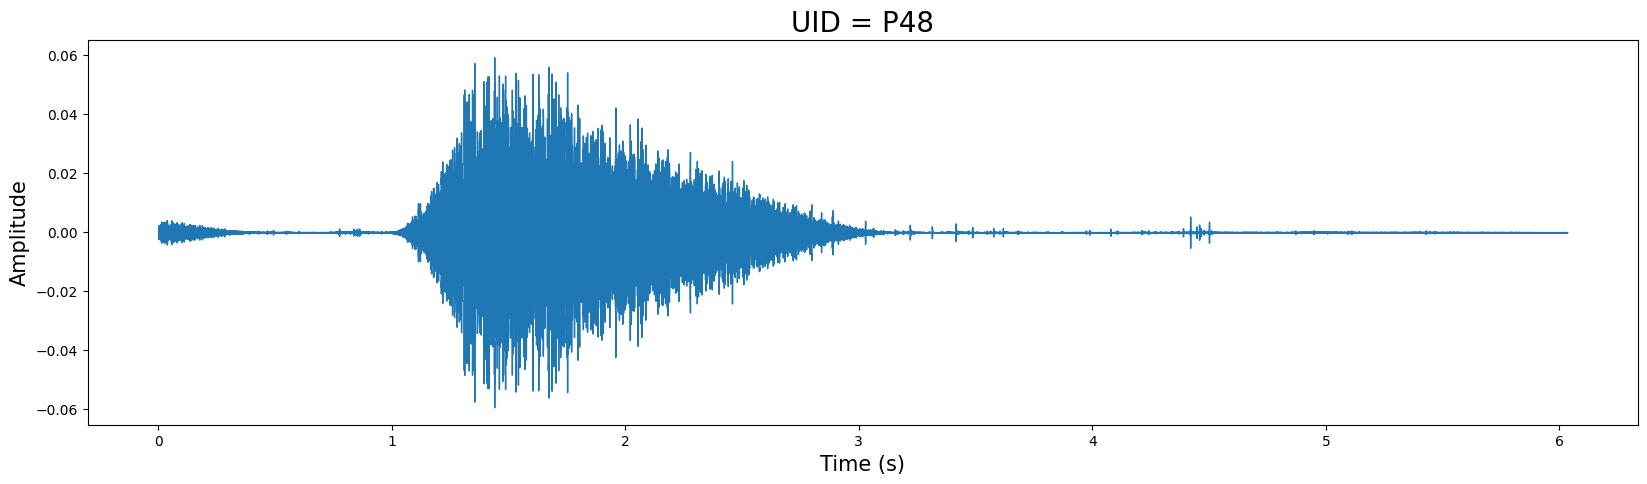

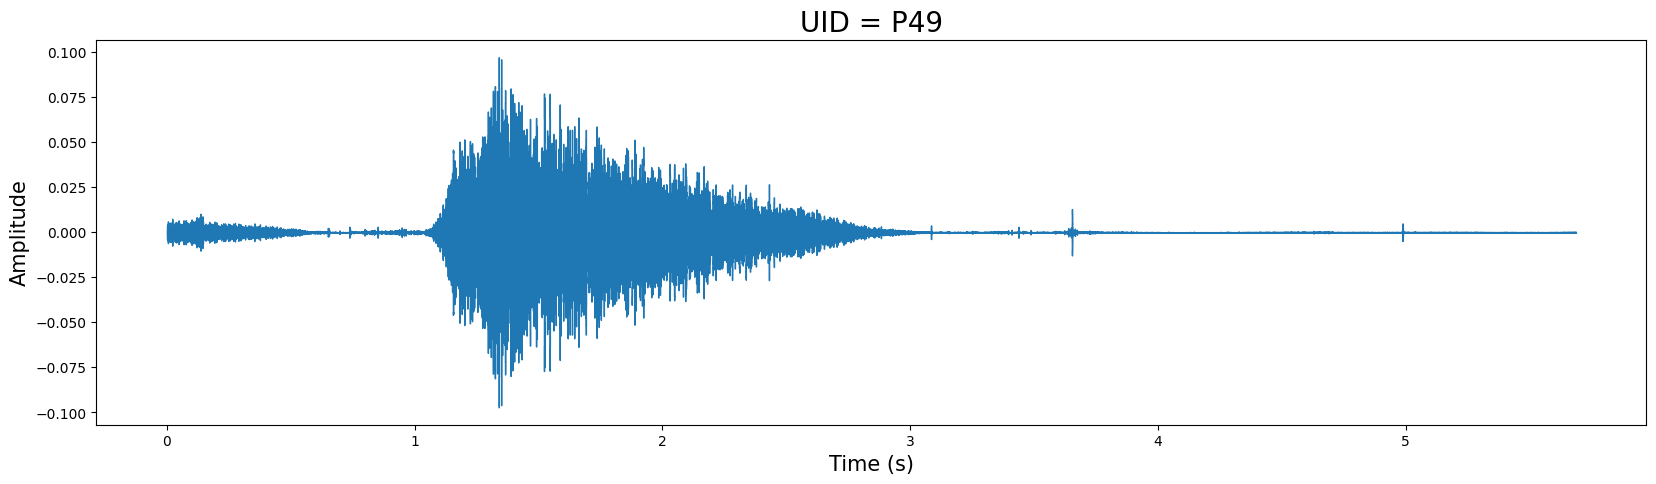

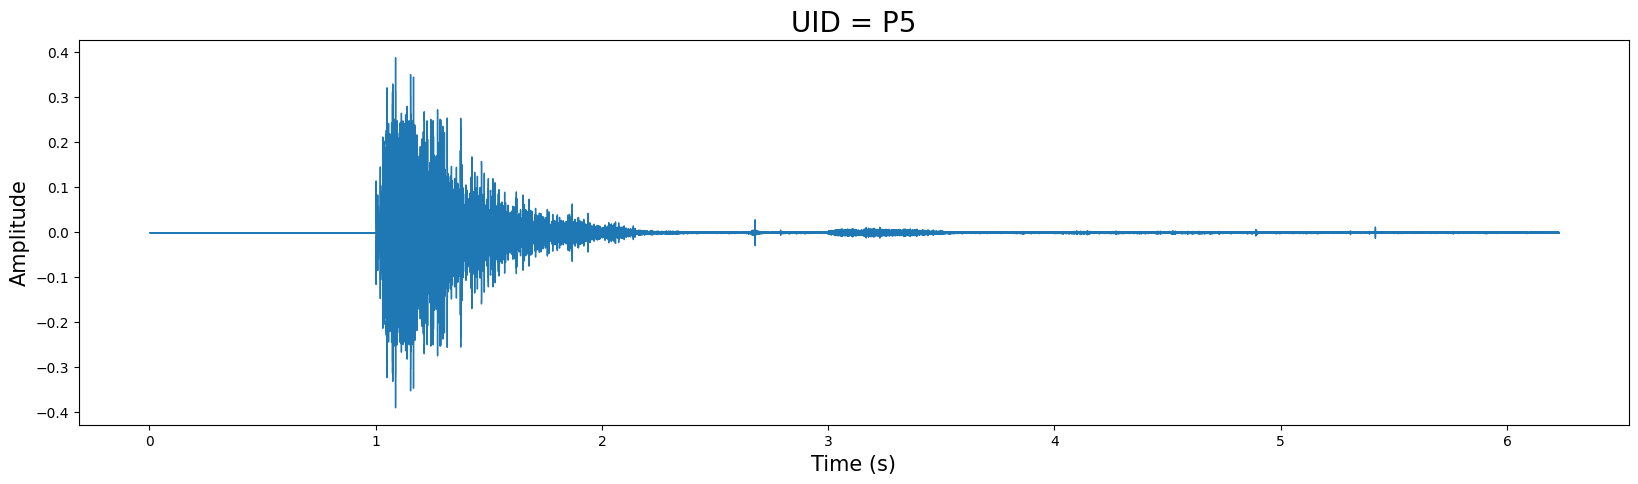

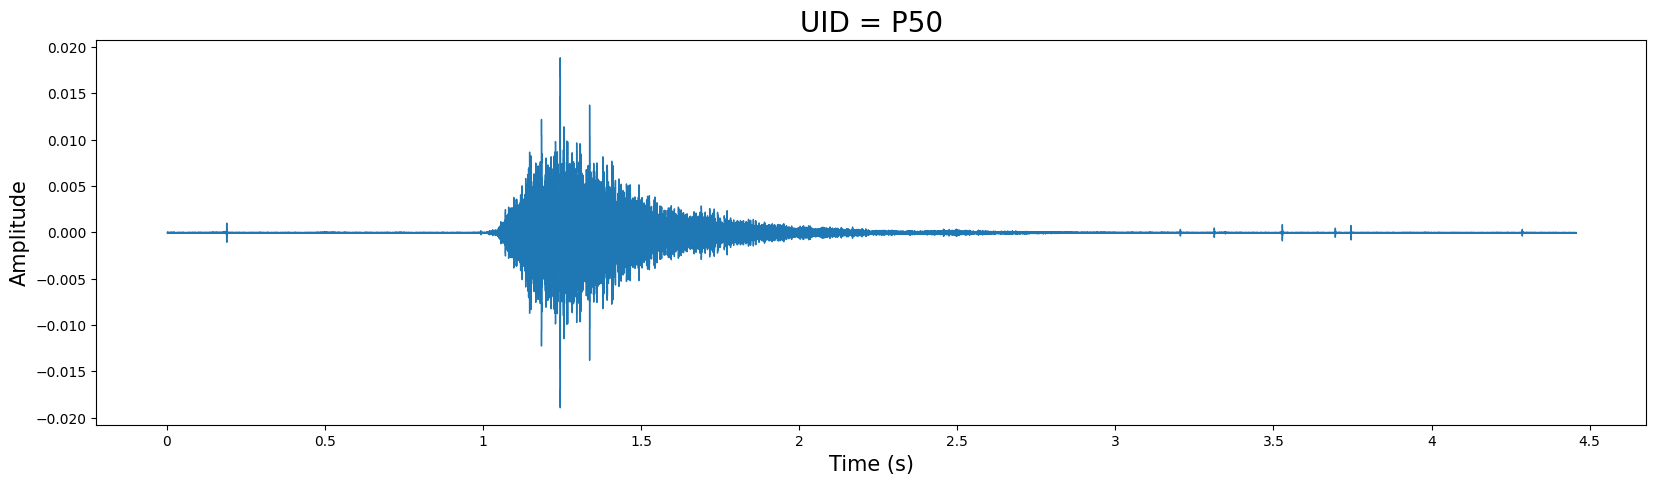

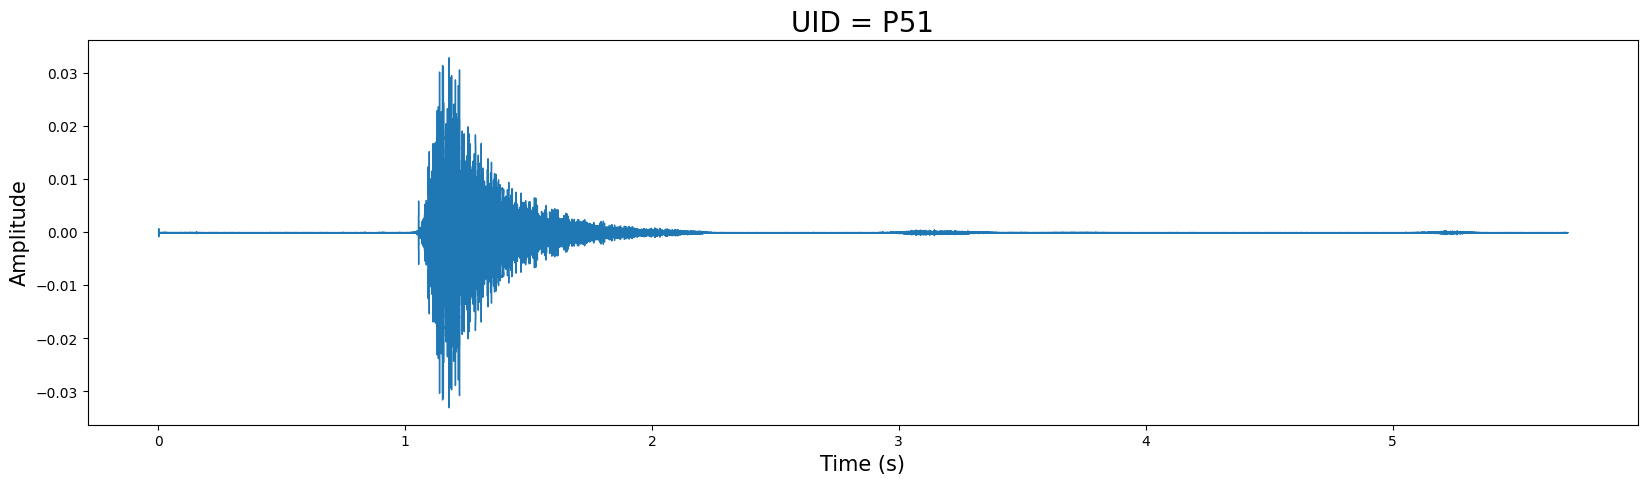

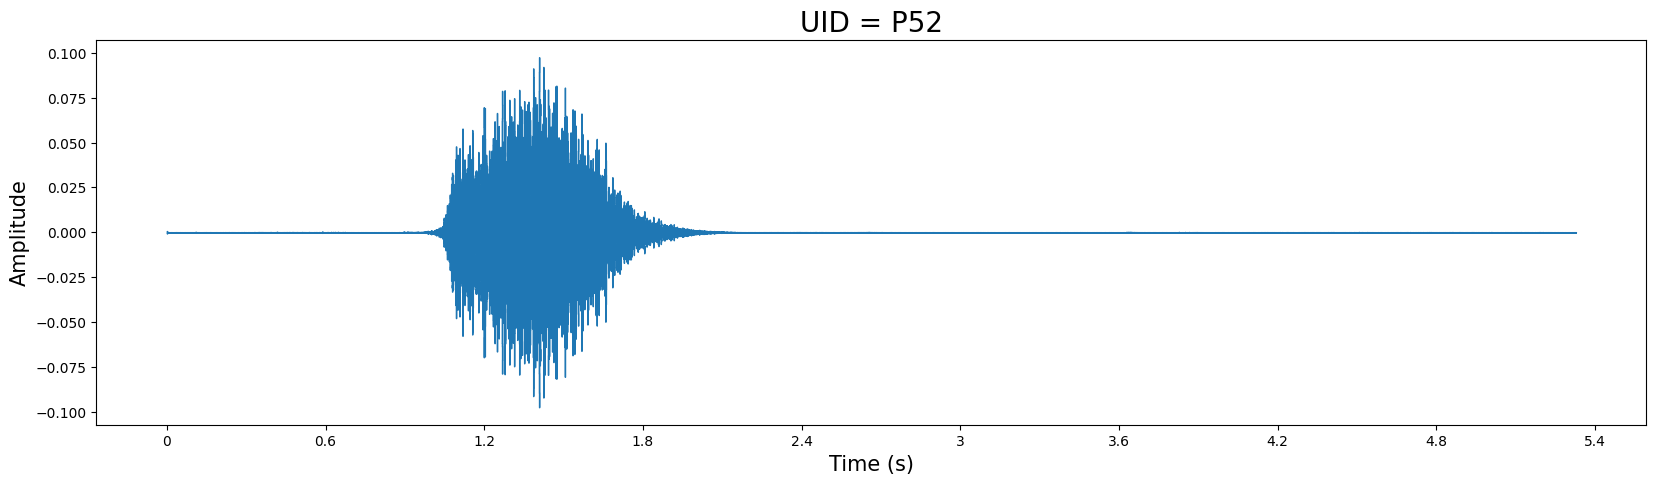

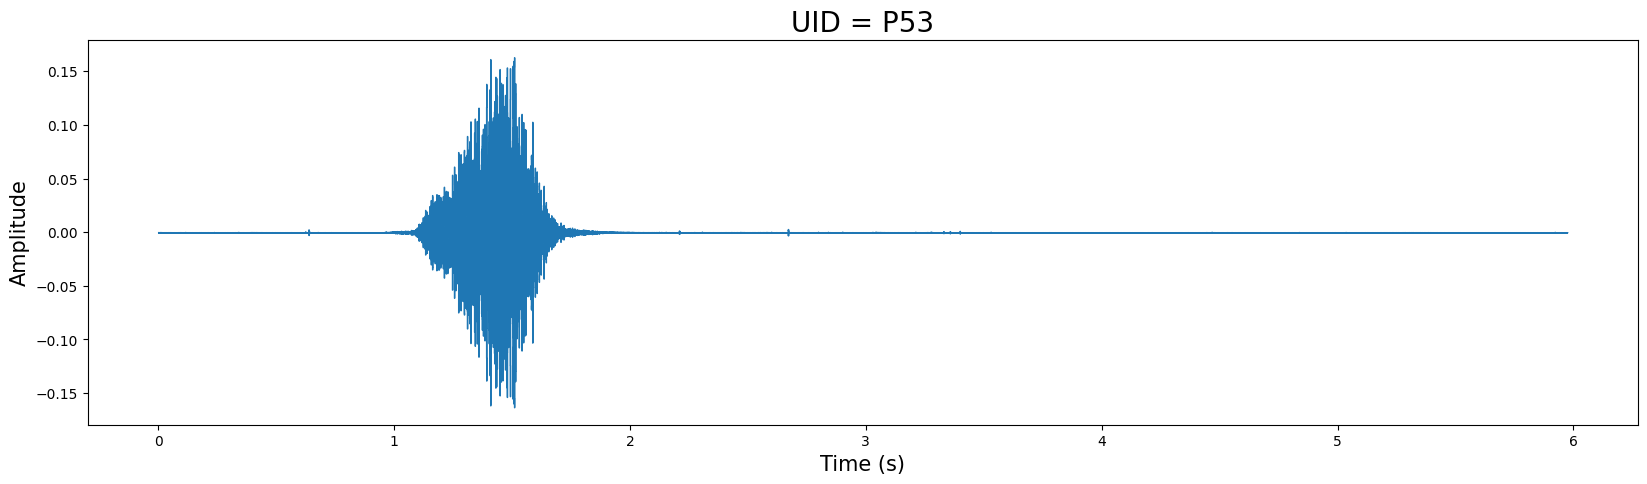

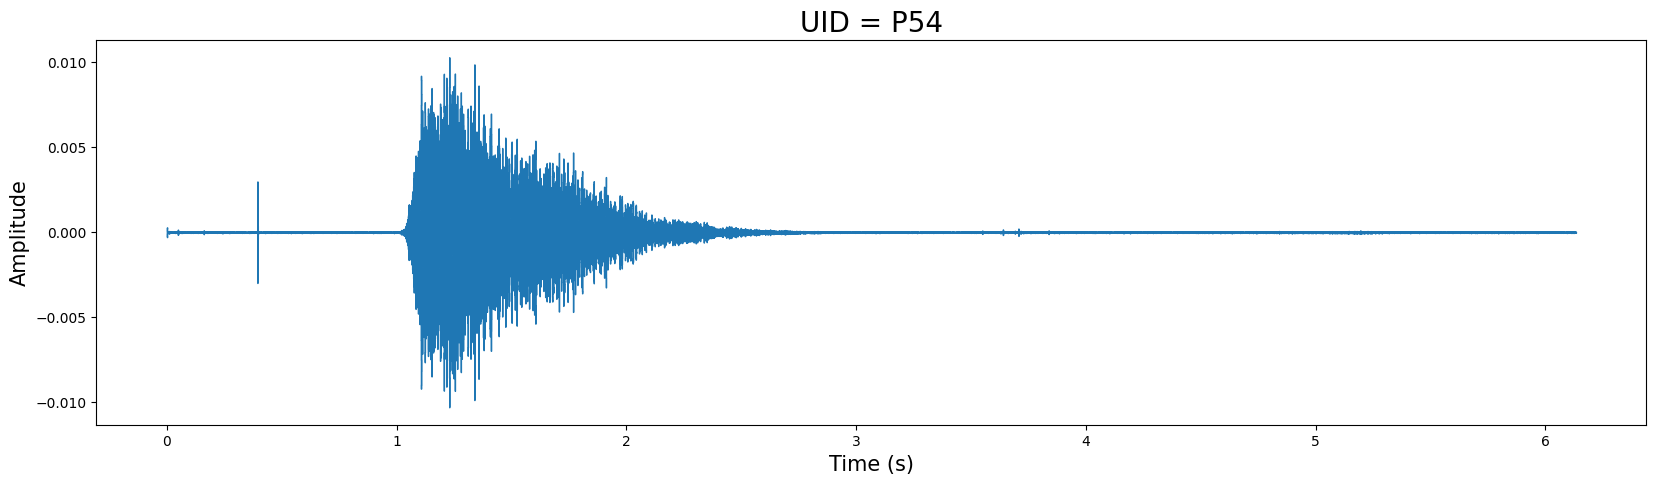

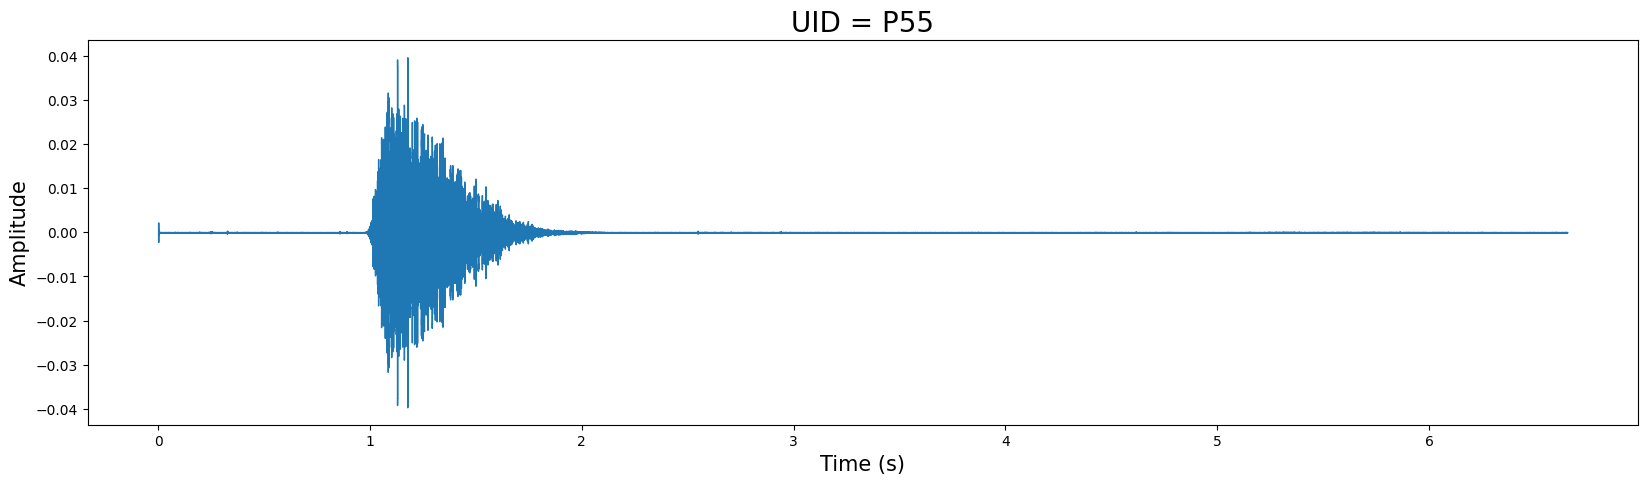

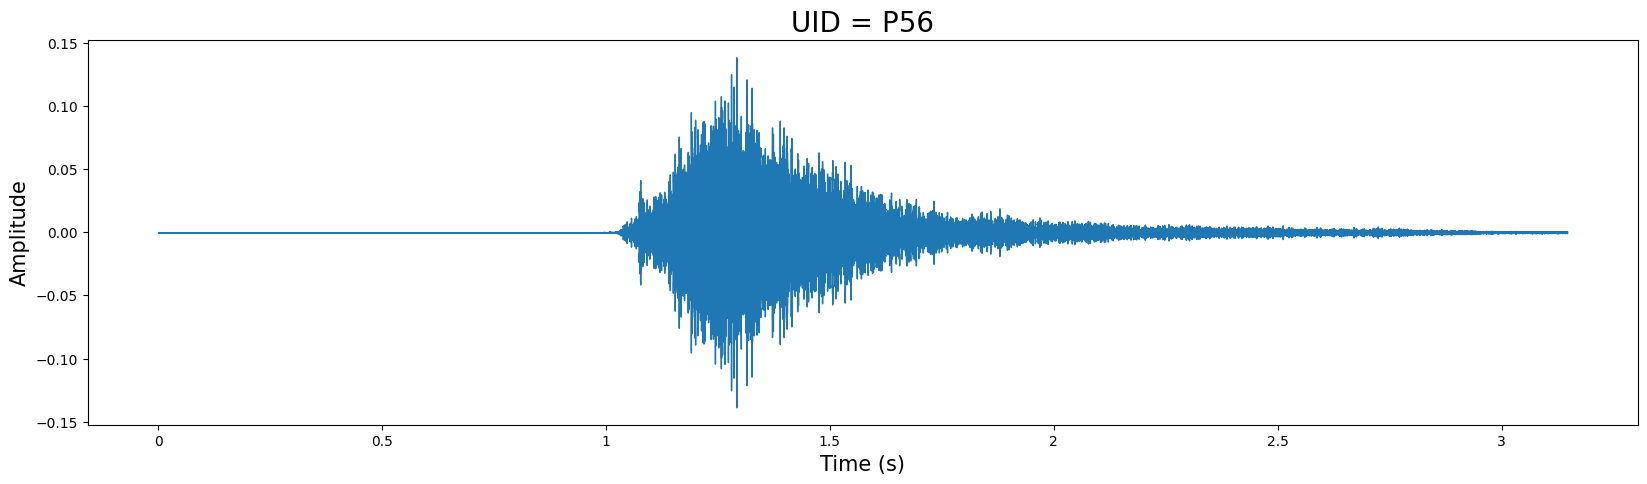

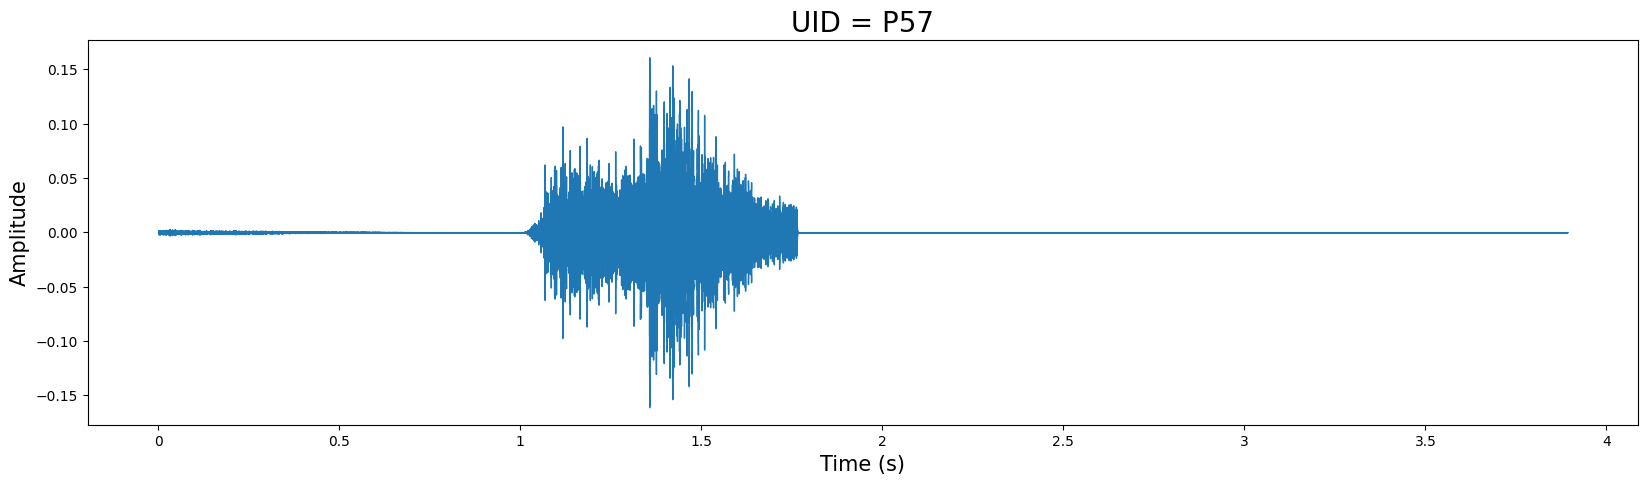

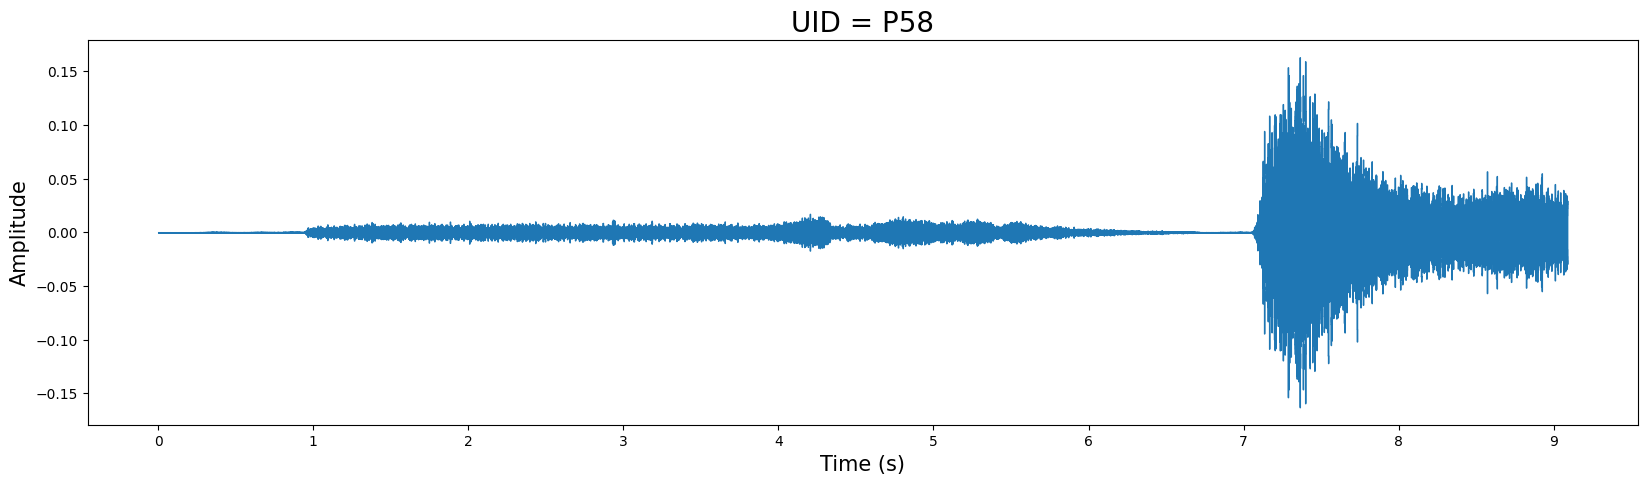

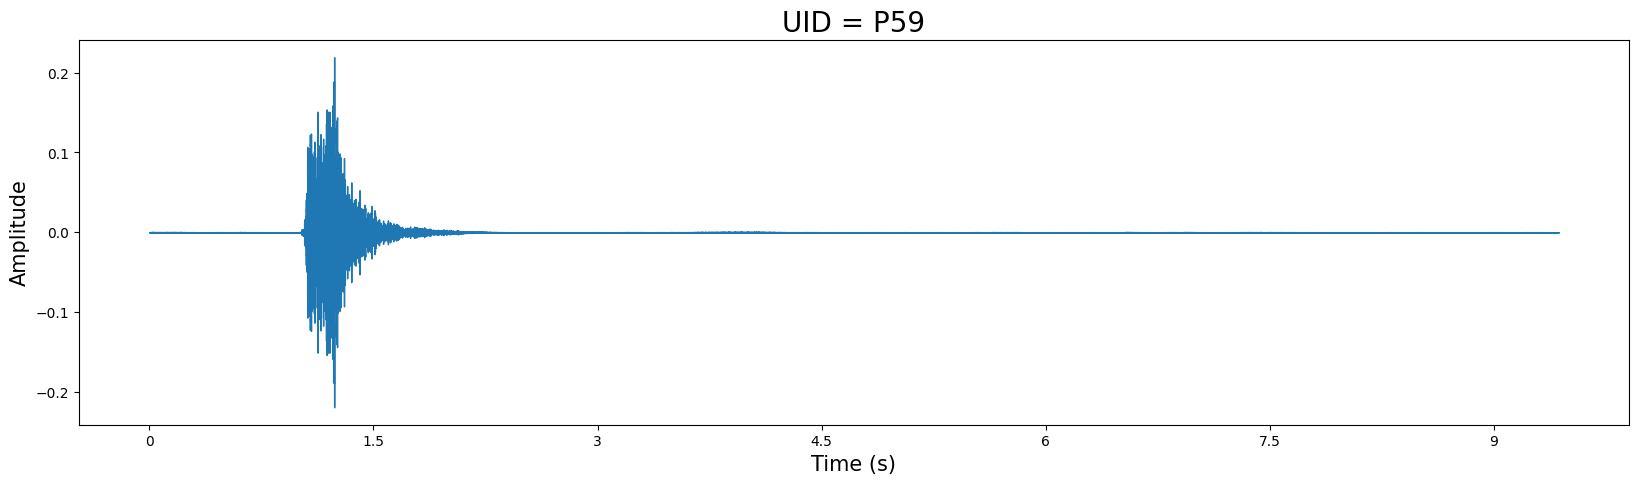

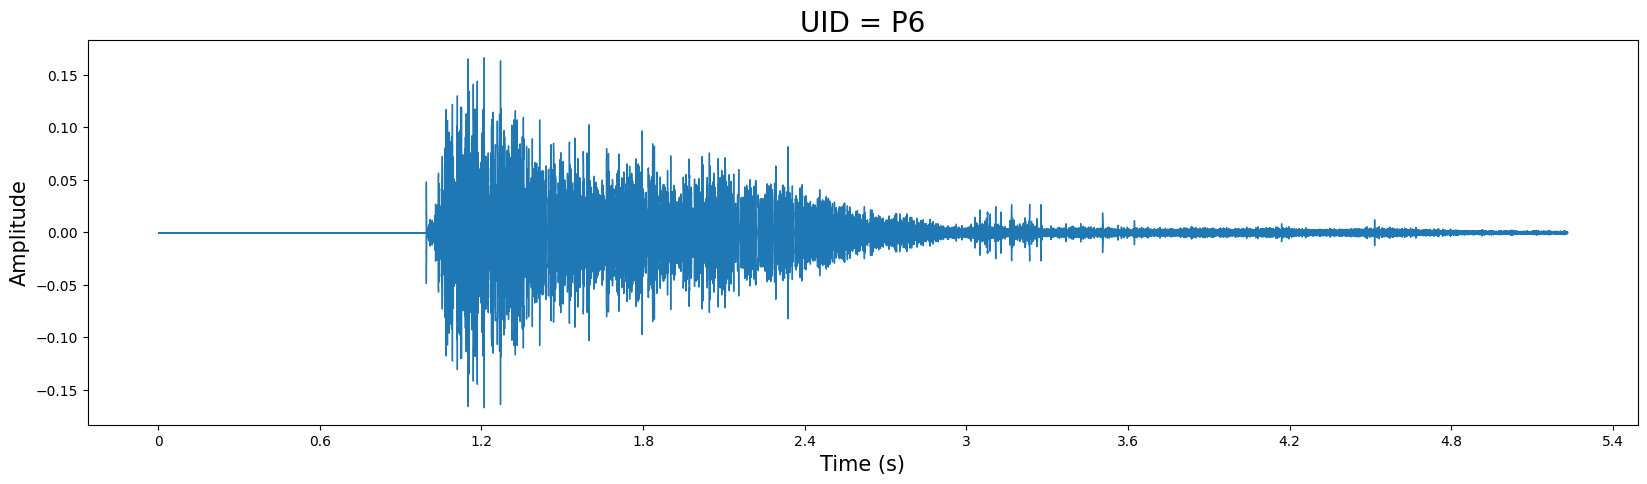

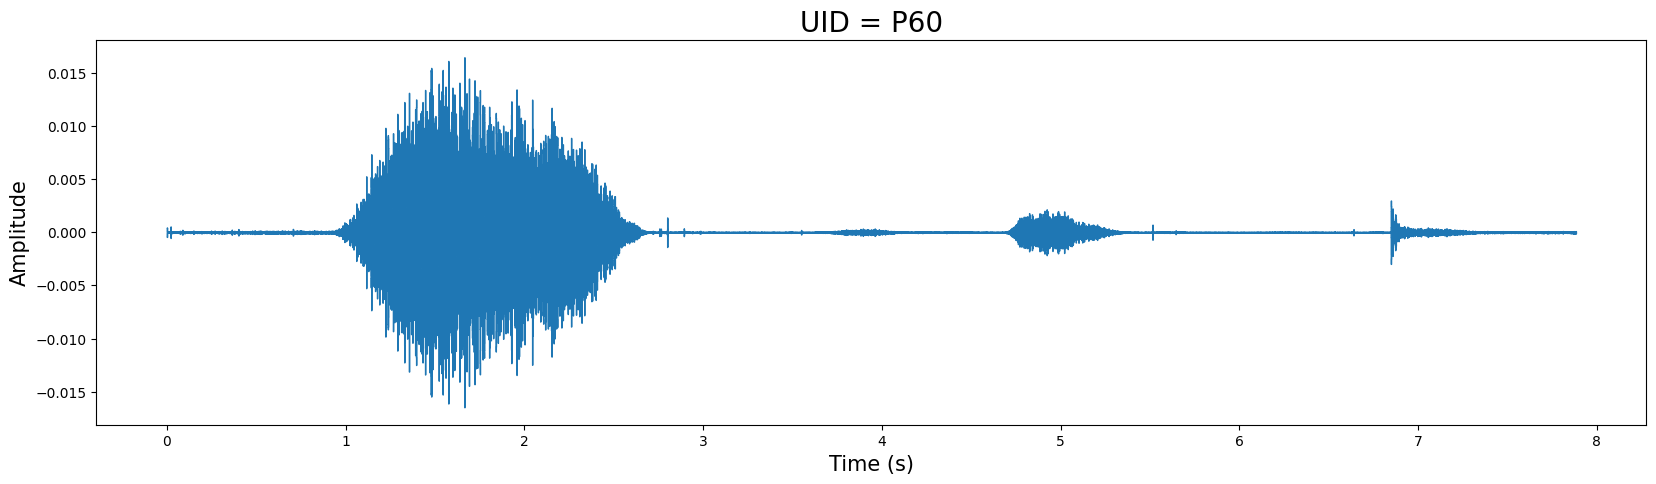

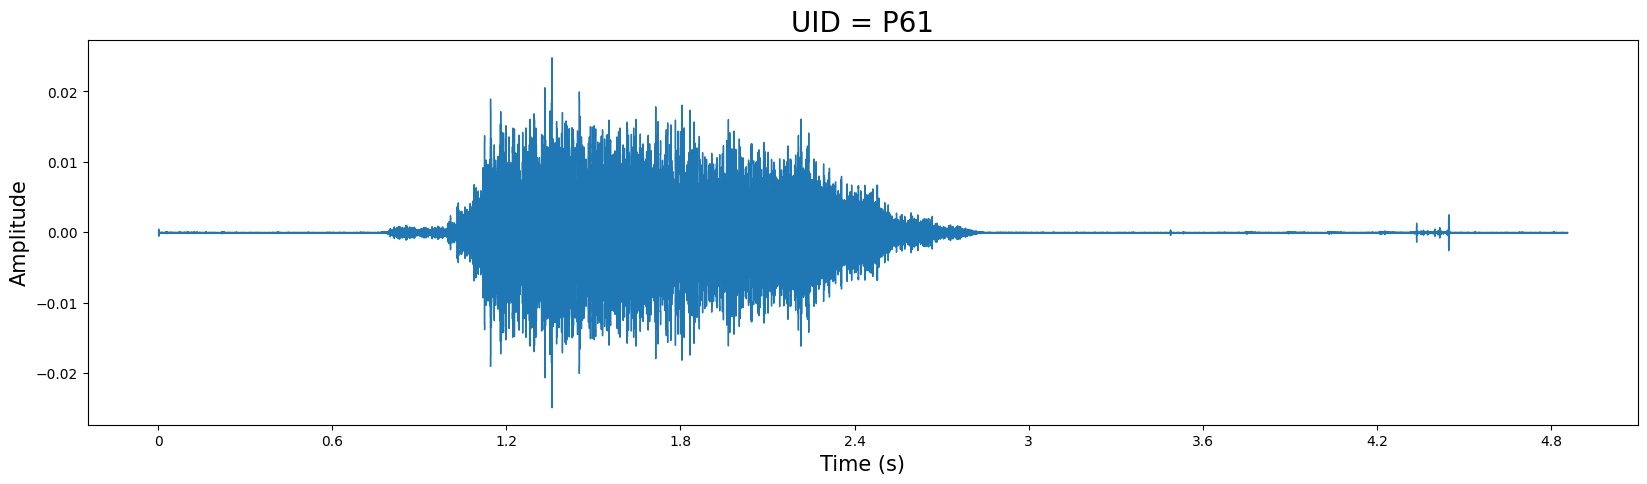

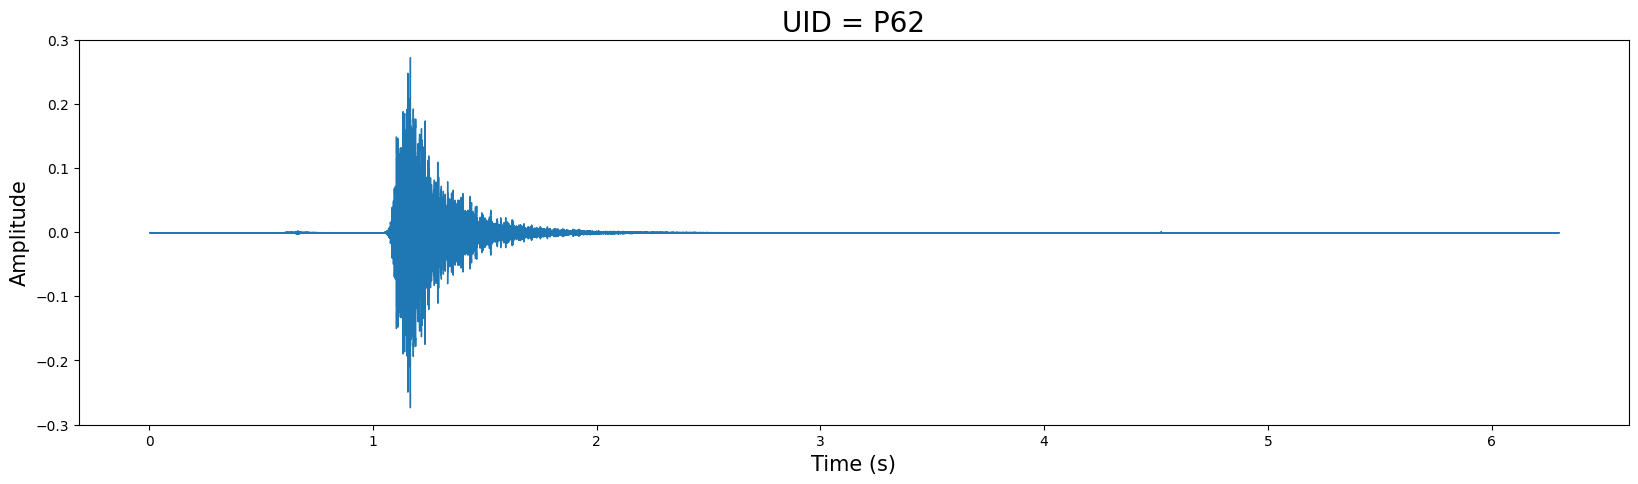

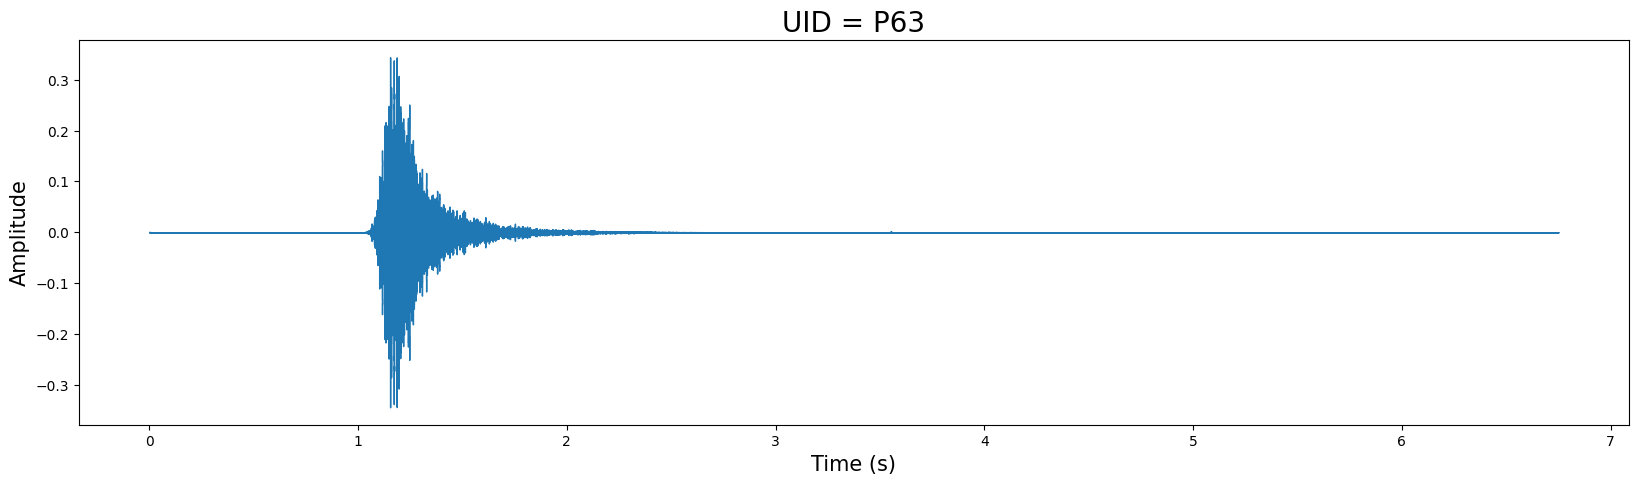

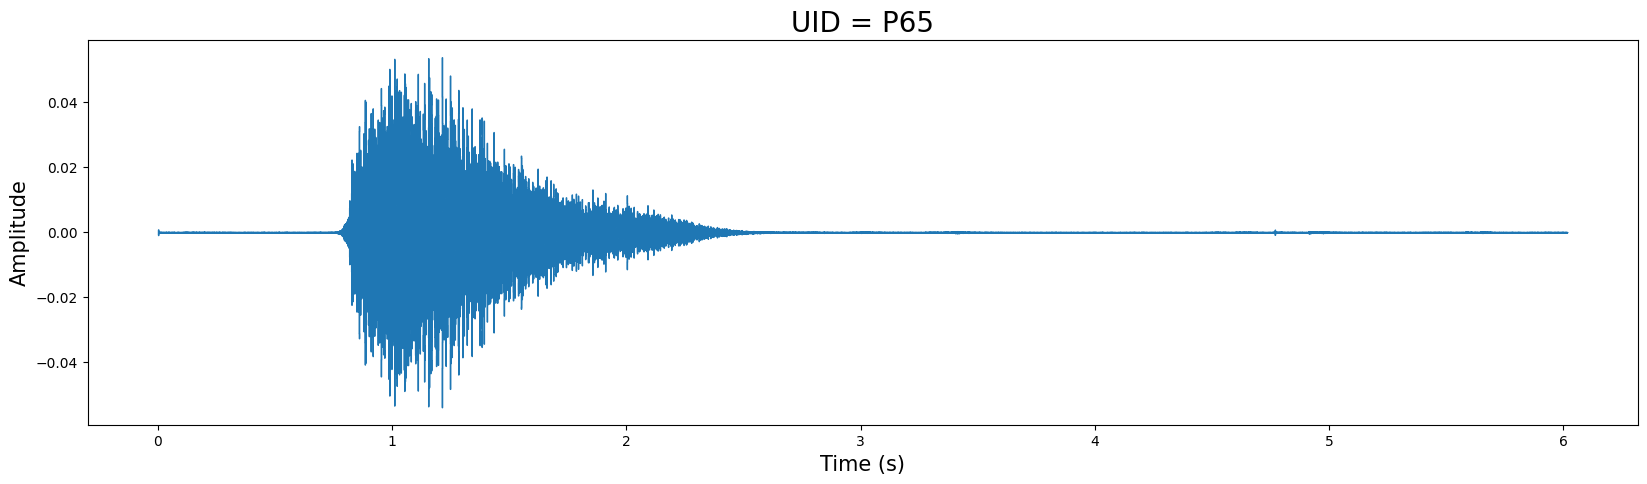

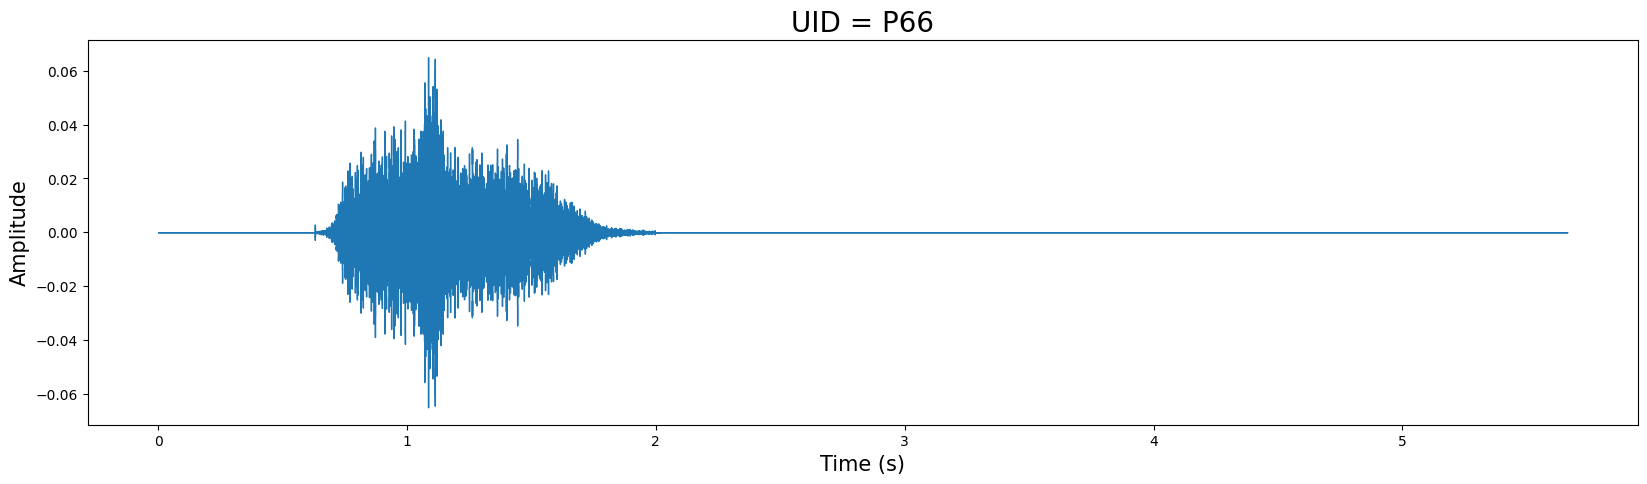

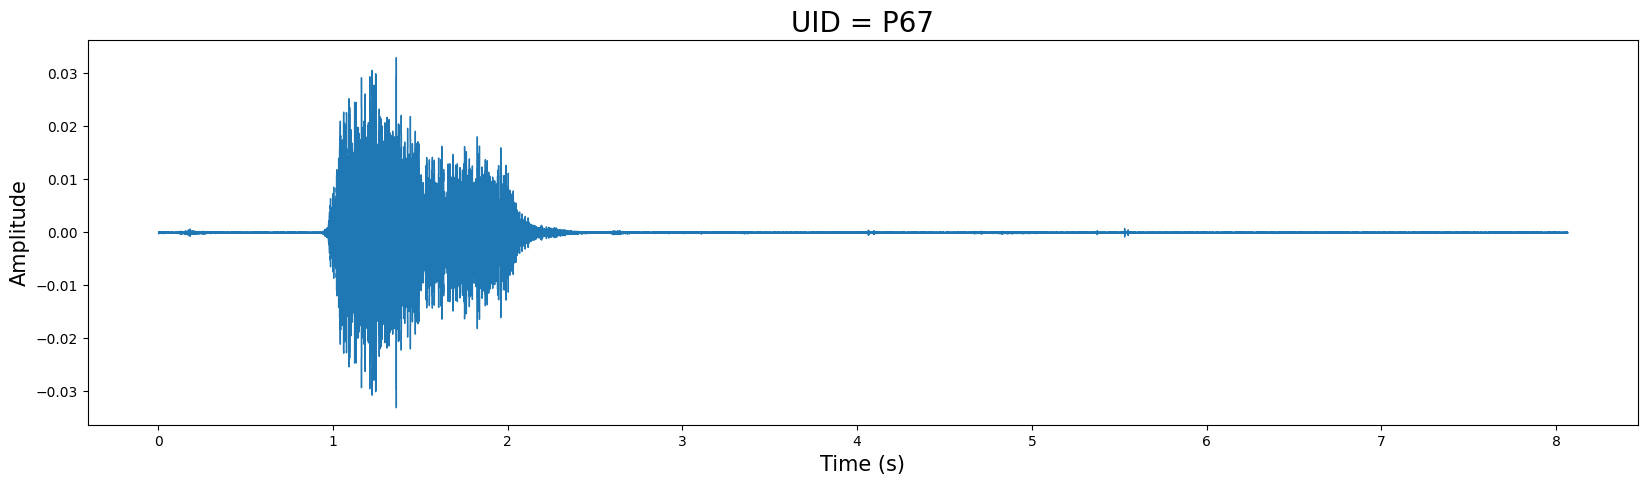

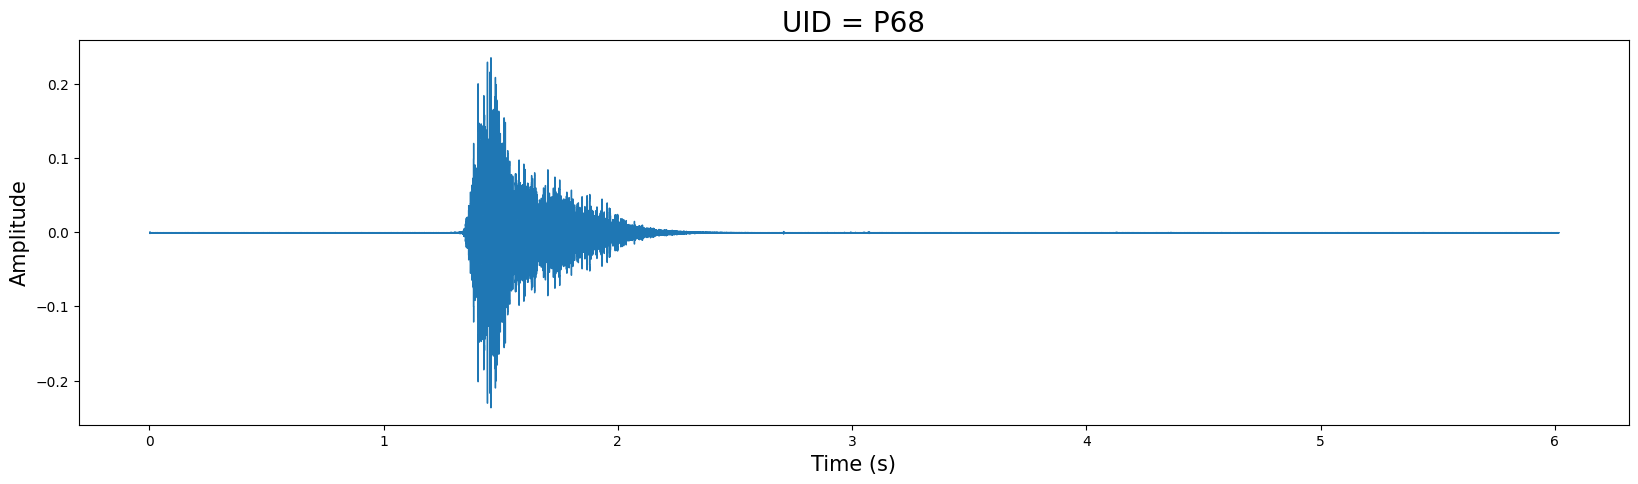

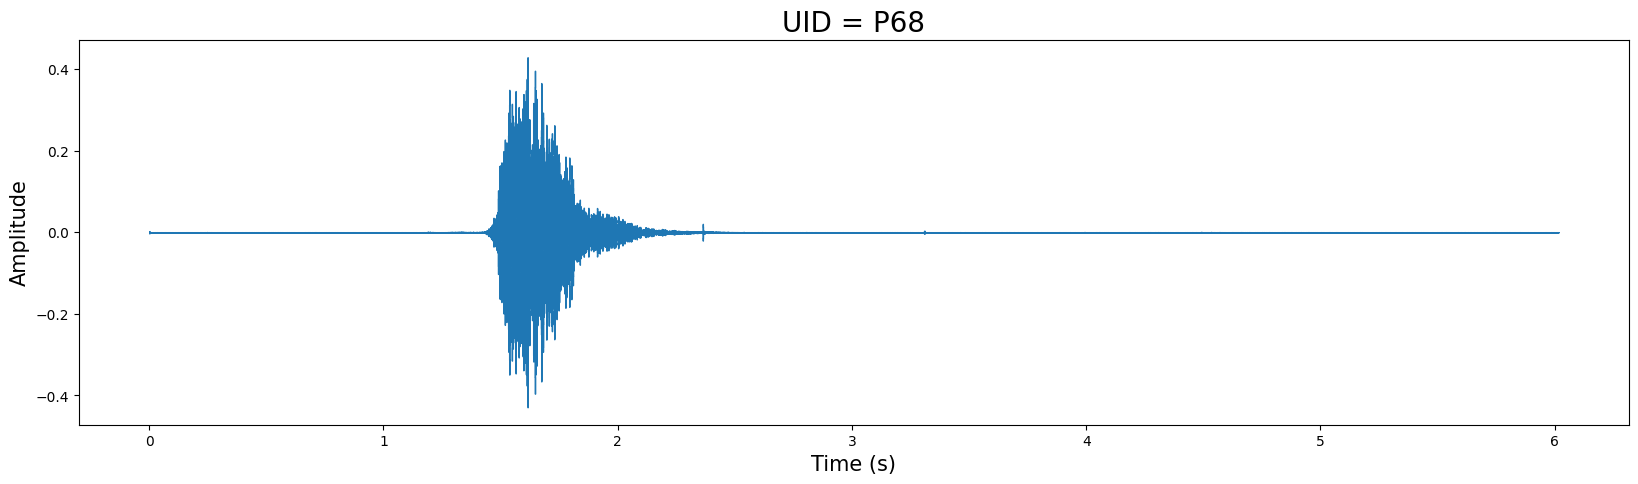

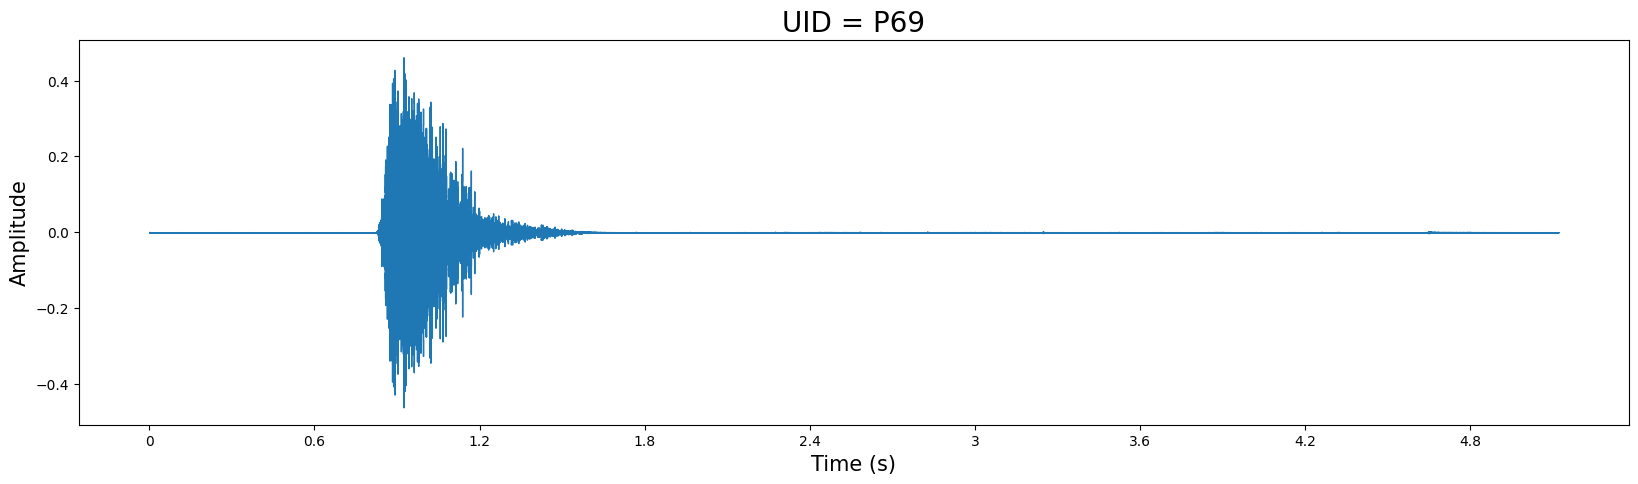

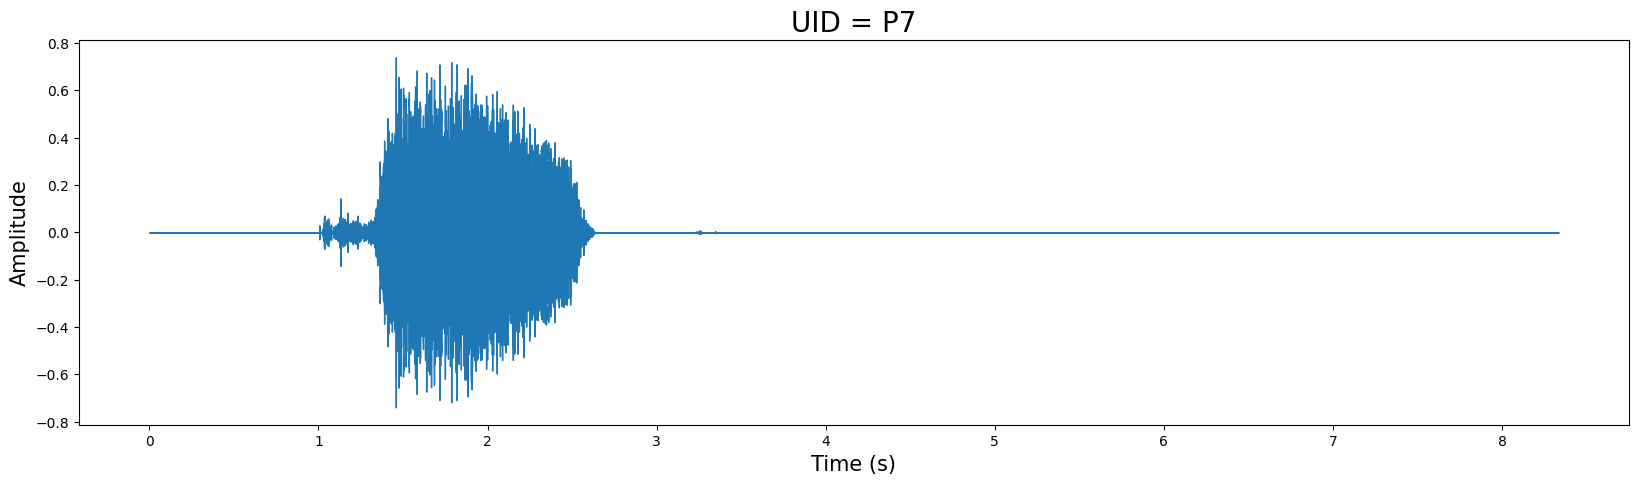

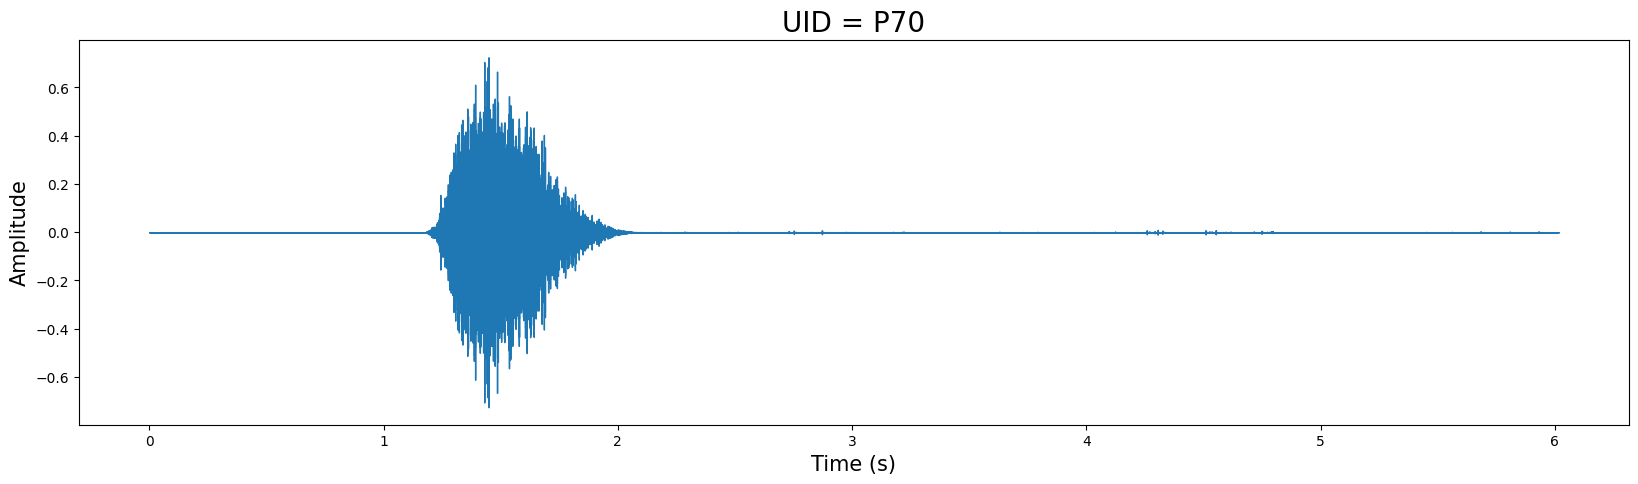

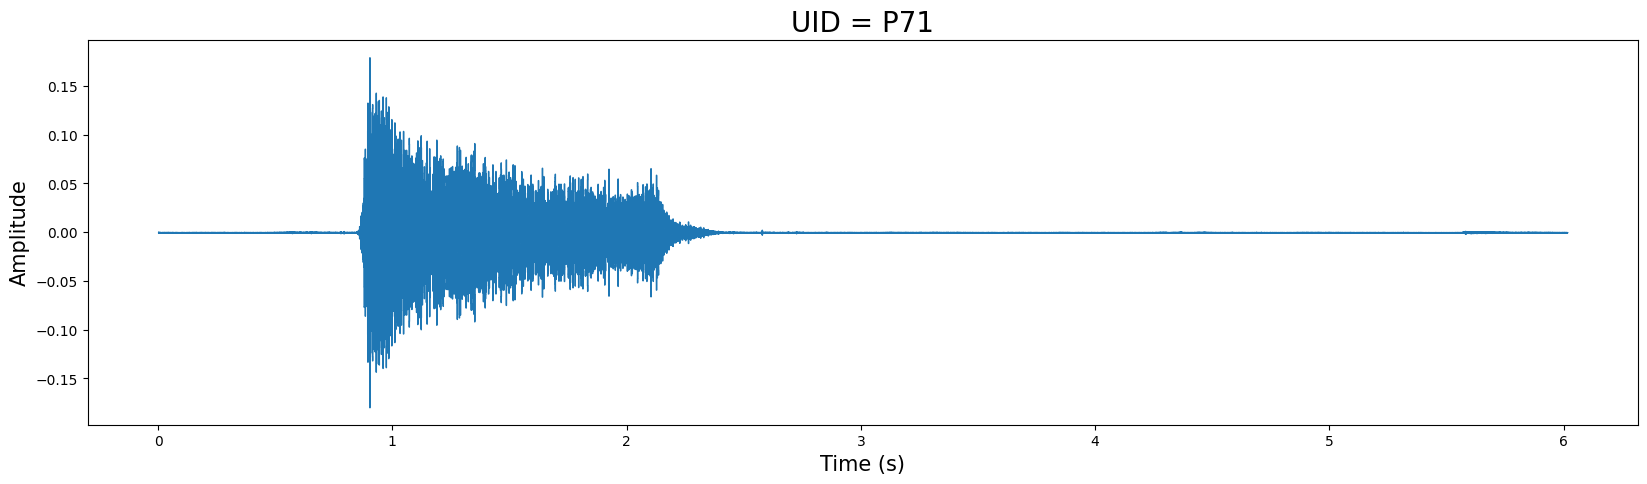

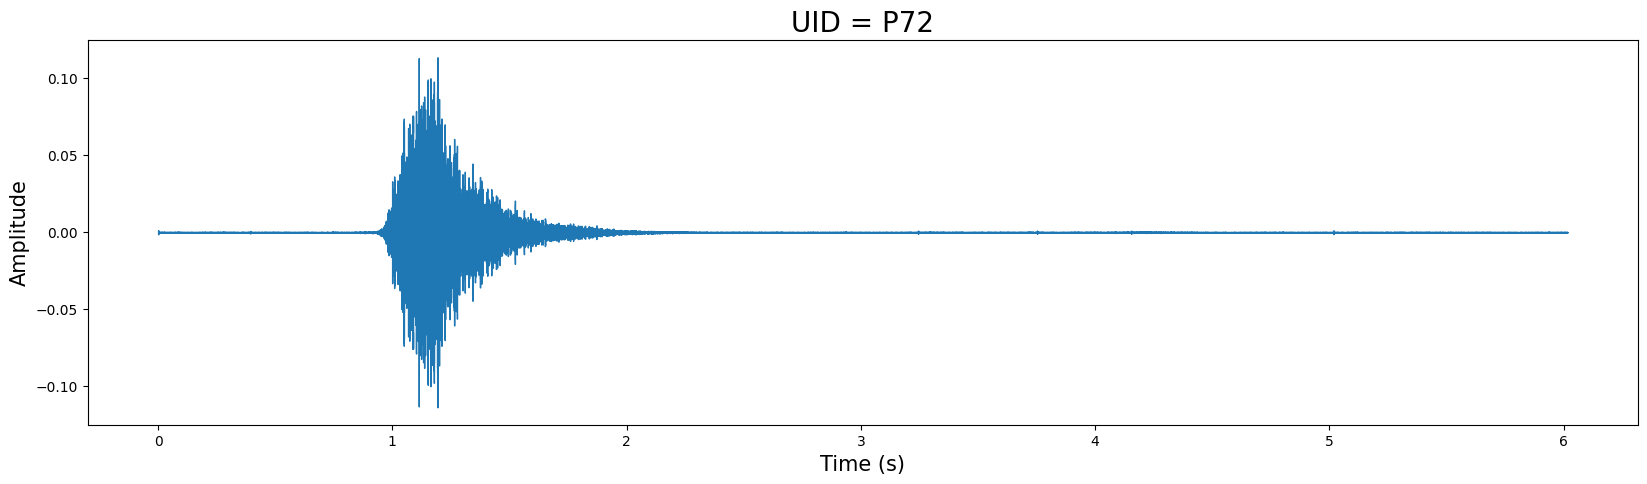

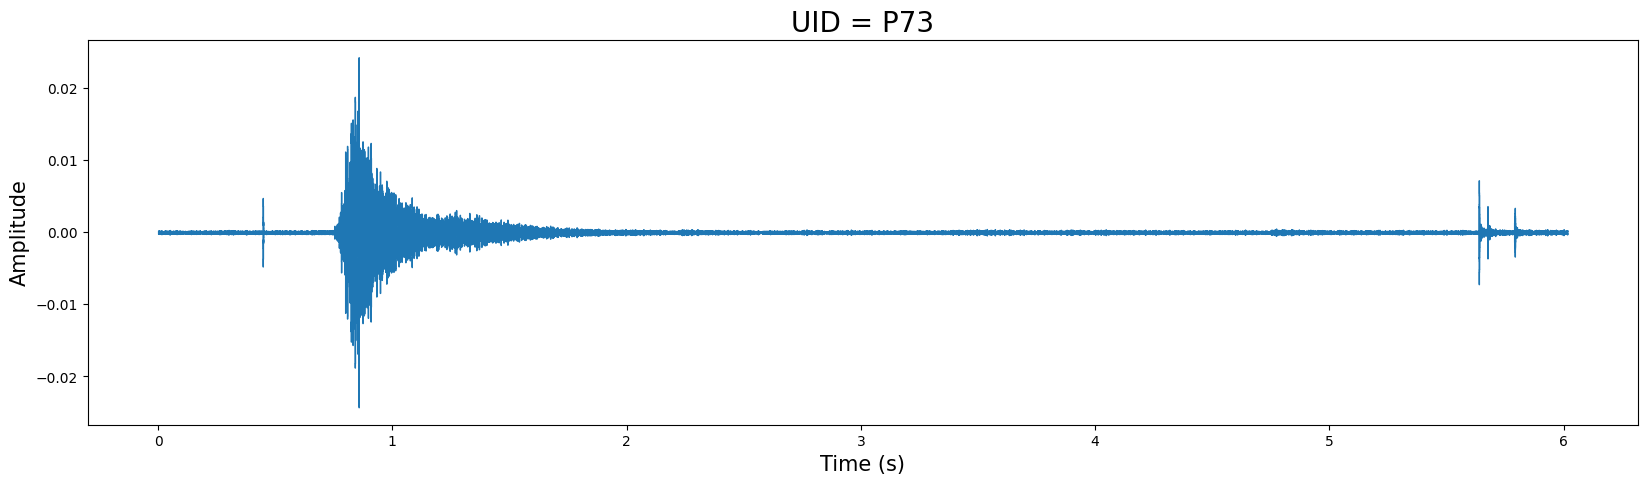

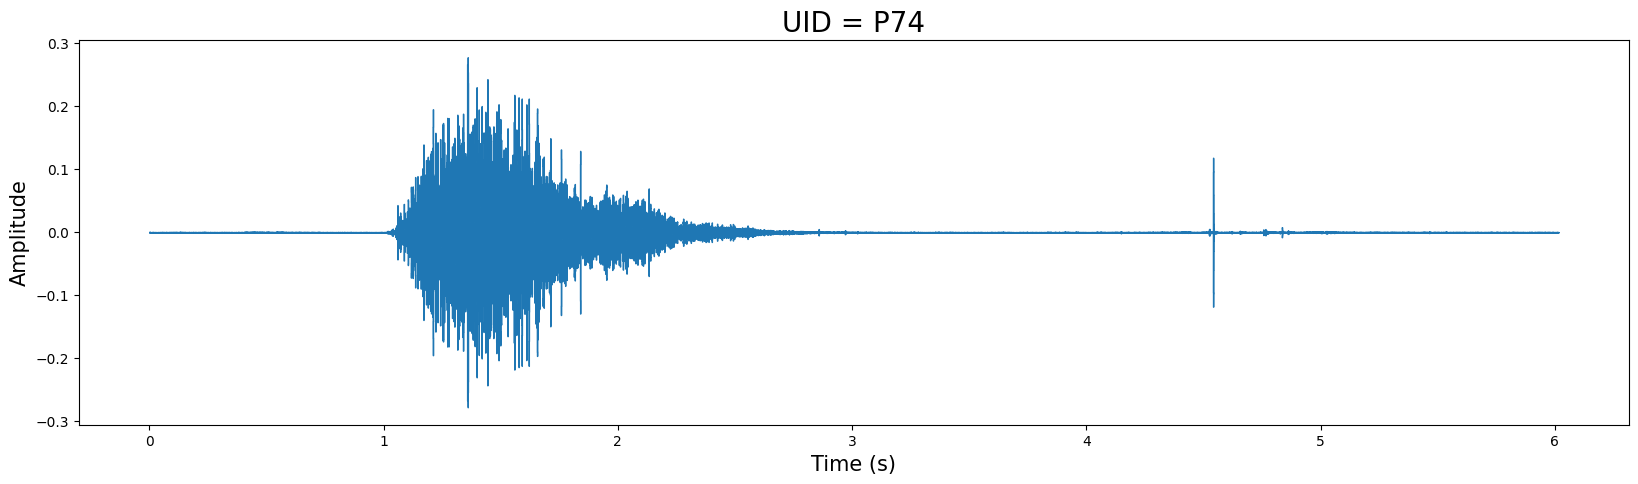

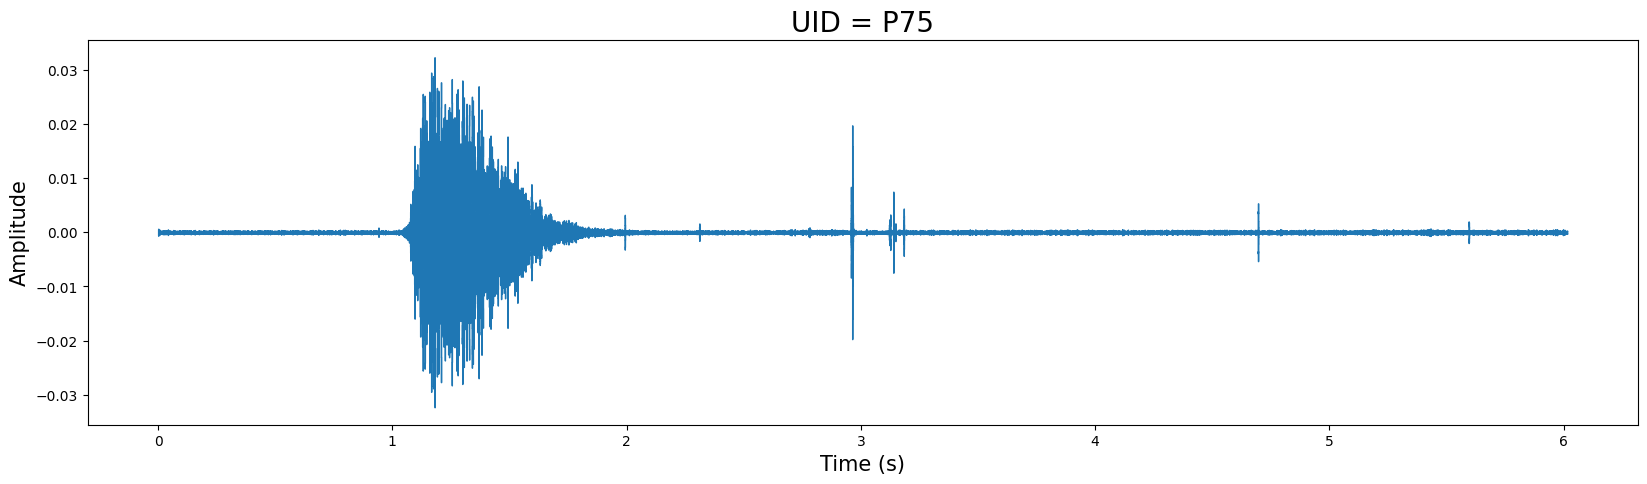

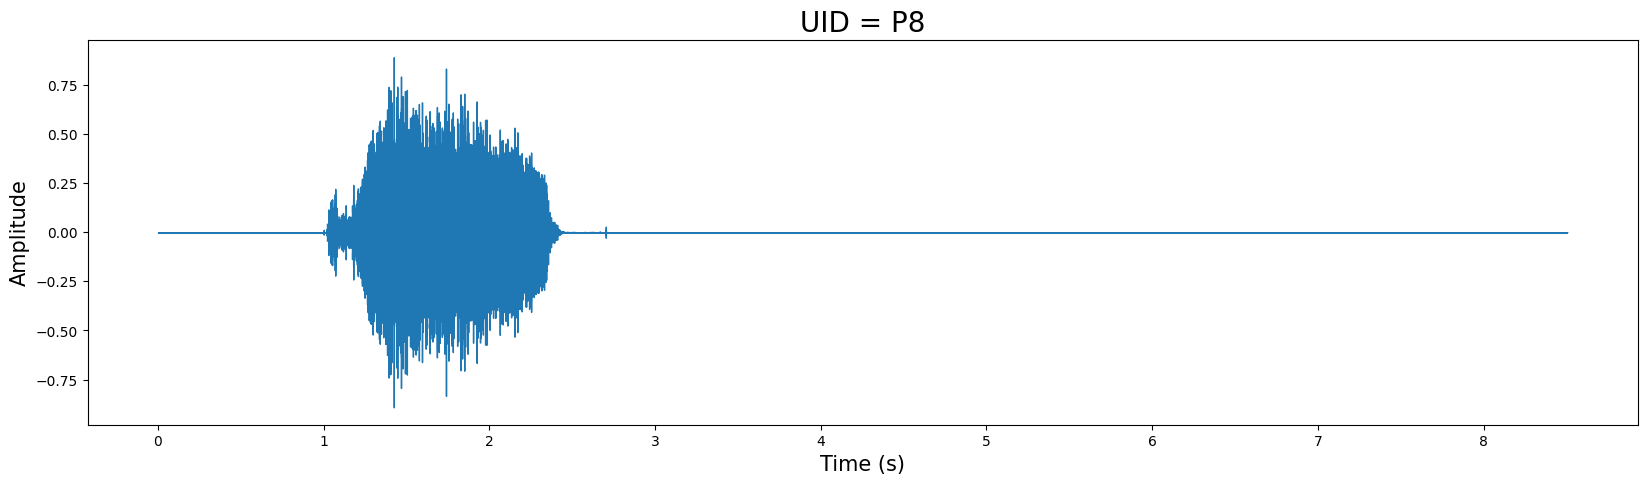

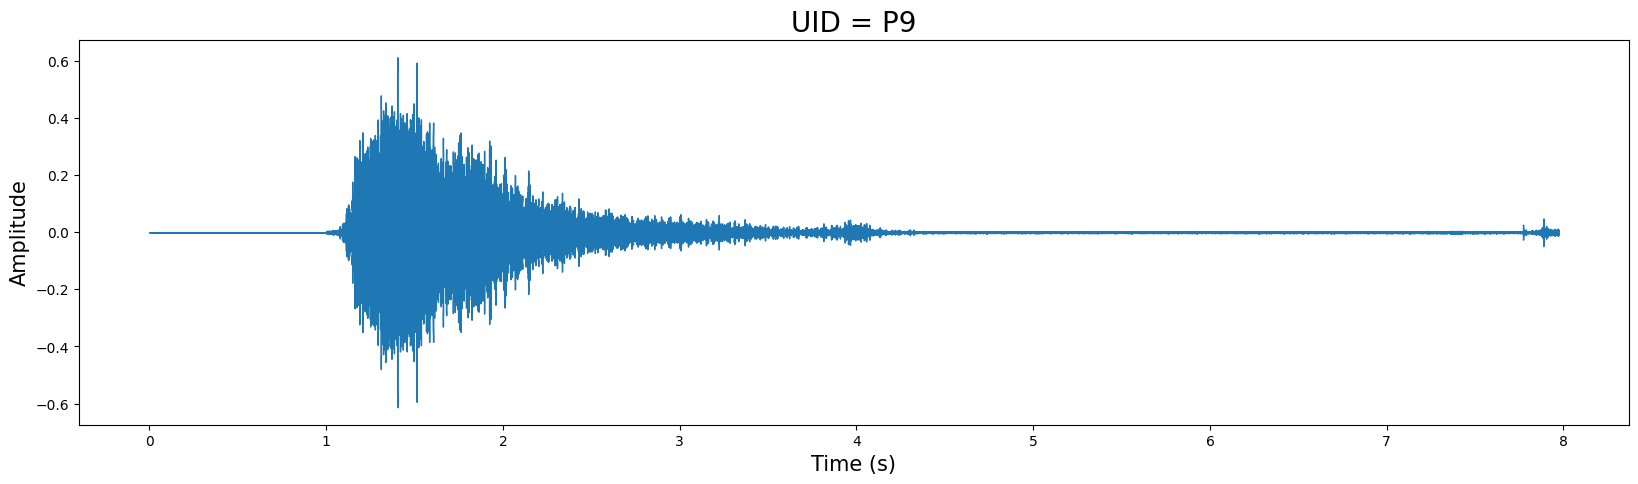

In [3]:
directory = '../1.Data/SpiroMask_Audio_Samples/'

cutoff_low = 3000       # low cut frequency for bandpass filter in Hz
cutoff_high = 5000      # high cut frequency for bandpass filter in Hz
order = 5               # order of the bandpass filter

# Iterate through all the files in the directory
for filename in os.listdir(directory):

    f = os.path.join(directory, filename)
    
    # checking if it is a file
    if os.path.isfile(f) :

        # Load the audio file
        x , sr = librosa.load(f,sr=16000)

        # Apply the bandpass filter
        x_filt = butter_bandpass_filter(x,cutoff_low,cutoff_high,sr,order)

        # Plot the waveform
        plt.figure(figsize=(20, 5))
        librosa.display.waveshow(x_filt, sr=sr)
        plt.title("UID = {}".format(filename.split('.')[0]), fontsize=20)
        plt.xlabel("Time (s)", fontsize=15)
        plt.ylabel("Amplitude", fontsize=15)
        plt.show()
